# Declaring target feature

In [1]:
target_features = ['GrainYield']
# target_features = ['Days2Maturity']

# Importing Libraries

In [2]:
import os
import csv
import numpy as np
import pandas as pd
from copy import copy
from datetime import datetime as dt

# Dictionaries
import json
from pprint import pprint

# Iterate in loops
import itertools
from itertools import zip_longest

# Simpsons integration
from numpy import trapz
from scipy.integrate import simps

# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# To display df nicely in loops
from IPython.display import display 
# Display rows and columns Pandas
pd.options.display.max_columns = 100
pd.set_option('display.max_rows',100)

# # For displaying max rows in series
# pd.options.display.max_rows = 10

# Importing data

In [3]:
# Prints the current working directory
os.getcwd()
# os.listdir()

'C:\\Users\\fahad\\MegaSync\\NMBU\\GitHub\\vPheno'

## Finding Username folder to make general path for multi PC use

In [4]:
username = str(os.getcwd()).split('\\')[2]
user_path = r'C:/Users/'+username+'/'
username, user_path

('fahad', 'C:/Users/fahad/')

## Declaring Import paths

In [5]:
main_path = r'./Data/'
path = r'./Data/3. merged data/'
if target_features[0] == 'GrainYield':
    export_path = './Data/4. results_GY/'
    export_path_comparability = './Data/4. results_GY/comparability/'
elif target_features[0] == 'Days2Maturity':
    export_path = './Data/4. results_dm/'
    export_path_comparability = './Data/4. results_DM/comparability/'

# Create export_path folder if not exists already
os.makedirs(path, exist_ok=True)
os.makedirs(export_path, exist_ok=True)
os.makedirs(export_path_comparability, exist_ok=True)

# os.listdir(path)

In [6]:
# Making dictionary of files in each folder, in case there are multiple types of data
dict_paths = {}
def explore(starting_path):
    for dirpath, dirnames, filenames in os.walk(starting_path):
        dict_paths[dirpath.split('/')[-2]] = filenames
#     pprint(dict_paths)
explore(path)

# Data Preparation
## Creating list of complete files

In [7]:
# Get the list of all files in directory tree at given path

files_with_address = []
files_list = []

for (dirpath, dirnames, filenames) in os.walk(path):
    files_with_address += [os.path.join(dirpath, file) for file in filenames]
    files_list.extend(filenames)
    
print(len(files_with_address), 'files found in the directory')
# files_with_address
# files_list

14 files found in the directory


## Data Checking/control

### Check for duplicate filenames

In [8]:
print('Total number of files are :', len(files_list))
print('Number of unique file names are:', len(set(files_list)))
print('There is/are', len(files_list) - len(set(files_list)),'duplicate file name/names.')
if len(files_list) - len(set(files_list)) > 0:
    raise NameError

Total number of files are : 14
Number of unique file names are: 14
There is/are 0 duplicate file name/names.


# Importing data files to Pandas

In [9]:
all_df = []
for data in files_with_address:
    file_name = os.path.splitext(os.path.basename(data))[0]

    # Replce all invalid characters in the name
    file_name = file_name.replace(" ", "_")
    file_name = file_name.replace("-", "_")
    file_name = file_name.replace(")", "")
    file_name = file_name.replace("(", "")
    df_name = file_name.replace(".", "")
    # Test: Check if the same date is already present in the current dict key
    if df_name in all_df:
        print(f'A file with the same name {df_name} has already been imported. \n Please check if there is duplication of data.')
        raise NameError
    all_df.append(df_name)

    locals()[df_name] = pd.read_csv(data, index_col=False)
    print(df_name, '=====', locals()[df_name].shape)
# all_df

Graminor_2019_Simps ===== (600, 123)
Graminor_2019_Trapz ===== (600, 123)
Graminor_2020_Simps ===== (800, 123)
Graminor_2020_Trapz ===== (800, 123)
Masbasis_2019_Simps ===== (528, 124)
Masbasis_2019_Trapz ===== (528, 124)
Masbasis_2020_Simps ===== (624, 126)
Masbasis_2020_Trapz ===== (624, 126)
Robot_2020_Simps ===== (96, 125)
Robot_2020_Trapz ===== (96, 125)
Staur_2019_Simps ===== (1328, 127)
Staur_2019_Trapz ===== (1328, 127)
Staur_2020_Simps ===== (1488, 124)
Staur_2020_Trapz ===== (1488, 124)


In [10]:
print(f'Total imported {len(all_df)}')
# all_df

Total imported 14


# Finding yield columns

## Importing Weather variables, yield columns, spectral indices, base indices columsn list

In [11]:
a_file = open(main_path+'vollebekk_weather_columns.json', "r")
output_str = a_file.read()
# The file is imported as string
# Converting it to python format
weather_cols_vollebekk = json.loads(output_str)
a_file.close()
pprint(len(weather_cols_vollebekk))

80


In [12]:
a_file = open(main_path+'staur_weather_columns.json', "r")
output_str = a_file.read()
# The file is imported as string
# Converting it to python format
weather_cols_staur = json.loads(output_str)
a_file.close()
pprint(len(weather_cols_staur))

80


In [13]:
a_file = open(main_path+"yield_columns.json", "r")
output_str = a_file.read()
# The file is imported as string
# Converting it to python format
yield_cols = json.loads(output_str)
a_file.close()
print(yield_cols)

['Days2Maturity', 'CodeName', 'Heading_Date', 'Pedigree', 'Lodging', 'GrainYield', 'Entry', 'Line', 'Name', 'Days2Heading', 'iBlock', 'Replicates', 'Maturity_Date', 'Block']


In [14]:
a_file = open(main_path+"spectral_indices_columns.json", "r")
output_str = a_file.read()
# The file is imported as string
# Converting it to python format
spectral_indices_all = json.loads(output_str)
a_file.close()
print(spectral_indices_all)

['NDVI', 'MTCI', 'DVI', 'GDVI', 'MTCI_CI', 'EXG', 'EXGR', 'RDVI', 'TDVI', 'GNDVI', 'NDRE', 'SCCI', 'EVI', 'TVI', 'VARI', 'GARI', 'GCI', 'GLI', 'NLI', 'MNLI', 'SAVI', 'GSAVI', 'OSAVI', 'GOSAVI', 'MSAVI2', 'MSR', 'GRVI', 'WDRVI', 'SR']


In [15]:
a_file = open(main_path+"base_indices_columns.json", "r")
output_str = a_file.read()
# The file is imported as string
# Converting it to python format
base_indices = json.loads(output_str)
a_file.close()
print(base_indices)

['Blue', 'Green', 'Red', 'RedEdge', 'NIR']


## XXXXXX Defining categories of features

In [16]:
# ToDo: Add check for duplicate columns in the df
base_indices
spectral_indices_all 
drop_indices = ['EVI', 'GLI', 'MTCI']
spectral_indices = [x for x in spectral_indices_all if x not in drop_indices]

# Staur weather columns are all also present in Vollebekk weather so they can be use as general weather features
weather_features = weather_cols_staur.copy()
environment_var = weather_features + ['Staur_Env', 'Vollebekk_Env']
# yield_cols

# Dropping DF which donot have the Target Feature

In [17]:
# Dropping unnecessary columns
all_df_dm = []
for df in all_df:
    temp_df = locals()[df].copy()
    if target_features[0] in temp_df.columns.tolist():
        all_df_dm.append(df)
#         print(df)

In [18]:
all_df_simps = [x for x in all_df_dm if 'Simps' in x]
all_df_trapz = [x for x in all_df_dm if 'Trapz' in x]
# all_df_simps, all_df_trapz

# Dropping unnecessary columns


In [19]:
# Dropping unnecessary columns

for df in all_df_dm:
    temp_df = locals()[df].copy()
    locals()[df] = temp_df[base_indices+spectral_indices_all+environment_var+['Name',target_features[0]]]
    print(df, temp_df.shape, '==>', locals()[df].shape)


Graminor_2019_Simps (600, 123) ==> (600, 118)
Graminor_2019_Trapz (600, 123) ==> (600, 118)
Graminor_2020_Simps (800, 123) ==> (800, 118)
Graminor_2020_Trapz (800, 123) ==> (800, 118)
Masbasis_2019_Simps (528, 124) ==> (528, 118)
Masbasis_2019_Trapz (528, 124) ==> (528, 118)
Masbasis_2020_Simps (624, 126) ==> (624, 118)
Masbasis_2020_Trapz (624, 126) ==> (624, 118)
Robot_2020_Simps (96, 125) ==> (96, 118)
Robot_2020_Trapz (96, 125) ==> (96, 118)
Staur_2019_Simps (1328, 127) ==> (1328, 118)
Staur_2019_Trapz (1328, 127) ==> (1328, 118)
Staur_2020_Simps (1488, 124) ==> (1488, 118)
Staur_2020_Trapz (1488, 124) ==> (1488, 118)


# Dealing with Nan values

## Dropping Missing values

In [20]:
# Dropping rows with missing value in any column

for df in all_df_dm:
    temp_df = locals()[df].copy()
    locals()[df] = temp_df.dropna(axis=0)
    print(temp_df.shape[0] - locals()[df].shape[0], ' rows dropped in ', df)
#     print(locals()[df].shape[0])

1  rows dropped in  Graminor_2019_Simps
1  rows dropped in  Graminor_2019_Trapz
1  rows dropped in  Graminor_2020_Simps
1  rows dropped in  Graminor_2020_Trapz
6  rows dropped in  Masbasis_2019_Simps
6  rows dropped in  Masbasis_2019_Trapz
116  rows dropped in  Masbasis_2020_Simps
116  rows dropped in  Masbasis_2020_Trapz
8  rows dropped in  Robot_2020_Simps
8  rows dropped in  Robot_2020_Trapz
0  rows dropped in  Staur_2019_Simps
0  rows dropped in  Staur_2019_Trapz
568  rows dropped in  Staur_2020_Simps
568  rows dropped in  Staur_2020_Trapz


# Normalizing the data using Z-Score from scipy

In [21]:
from scipy.stats import zscore

for df in all_df_dm:
    temp_df = locals()[df].copy()
    for col in temp_df.columns:
        # Checking if the column is not a yield column
        if col not in yield_cols+environment_var:
            temp_df[col] = zscore(temp_df[col])
    locals()[df] = temp_df.copy()
    print(df)

Graminor_2019_Simps
Graminor_2019_Trapz
Graminor_2020_Simps
Graminor_2020_Trapz
Masbasis_2019_Simps
Masbasis_2019_Trapz
Masbasis_2020_Simps
Masbasis_2020_Trapz
Robot_2020_Simps
Robot_2020_Trapz
Staur_2019_Simps
Staur_2019_Trapz
Staur_2020_Simps
Staur_2020_Trapz


# Importing functions 

In [22]:
from functions.save_results import *
from functions.split_data import *
from functions.regression import *
from functions.plot_featimp import *

from functions.save_results import save_results, save_grid_results
from functions.split_data import list_test_train_df, data_prep_field
from functions.regression import training_regr, training_gkf_std, grid
from functions.plot_featimp import plot_feat_imp

# ML Models

In [23]:
import time
# Pre.Processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GroupKFold
# from sklearn.model_selection import StratifiedGroupKFold
# Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
# Models
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
# Metrices
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

## XXXXXX Parameters

In [24]:
threshold_all = 'top_25'
sort_feature_imp = True

# show_feat_imp_plot = True
# save_feat_imp_plot = True
# save_results_now = True
scatter_plot = True
scatter_save = True


show_feat_imp_plot = False
save_feat_imp_plot = False
save_results_now = False
# scatter_plot = False
# scatter_save = False

scatter_marker_size = 3
scatter_fig_size = (5, 5)

agg_method = 'Simpsons'
# agg_method = 'Trapezoid'

In [25]:
feature_counter = 0

# training_features = base_indices + spectral_indices_all + environment_var
training_features = base_indices + spectral_indices_all + weather_features
# training_features =  base_indices + spectral_indices + weather_features
# training_features =  spectral_indices + weather_features
# training_features = spectral_indices

target_features

group_feature = ['Name']

if agg_method == 'Simpsons':
    all_df_now = all_df_simps.copy()
elif agg_method == 'Trapezoid': 
    all_df_now = all_df_trapz.copy()


# Checking which data to use
if agg_method == 'Simpsons':
    all_df_now = all_df_simps.copy()
    export_path_plots = export_path+'/Simps/'
elif agg_method == 'Trapezoid': 
    all_df_now = all_df_trapz.copy()
    export_path_plots = export_path+'/Trapz/'

## Fine Tuning the models using all data

### All data mixed

In [26]:
temp_list = [x for x in all_df_now if not 'Robot' in x]

# Making list of df for conct before training
# This is different form list of srtings, as this is a list of actual dataframes
df_list = []
for x in temp_list:
    df_list.append(locals()[x])

# Conct all df to one df    
df_ = pd.concat(df_list).reset_index(drop=True)

# Shuffeling all the items/rows
df_shuffle = df_.sample(frac=1, random_state=1).reset_index(drop=True)

X = df_shuffle[training_features+['Name']]
y = df_shuffle[target_features].values.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

groups = X_train[group_feature].values.ravel()

X_train = X_train.drop(['Name'], axis=1).values
X_test = X_test.drop(['Name'], axis=1).values

gkf = list(GroupKFold(n_splits=6).split(X_train, y_train, groups))

### SVR

In [27]:
# from sklearn.svm import SVR

# model = SVR(verbose=15)
# model.fit(X_train, y_train)

In [28]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import classification_report
# from sklearn.svm import SVR

# # Set the parameters by cross-validation
# tuned_parameters = [
#     {"kernel": ["rbf"], "gamma": [1e-3, 1e-4], "C": [1, 10, 100, 1000]},
#     {"kernel": ["linear"], "C": [1, 10, 100, 1000]},
# ]

# scores = ["r2", "neg_mean_squared_error"]

# for score in scores:
#     print("# Tuning hyper-parameters for %s" % score)
#     print()

#     clf = GridSearchCV(SVR(), tuned_parameters, scoring=score, n_jobs=-1, verbose = 10)
#     clf.fit(X_train, y_train)

#     print("Best parameters set found on development set:")
#     print()
#     print(clf.best_params_)
#     print()
#     print("Grid scores on development set:")
#     print()
#     means = clf.cv_results_["mean_test_score"]
#     stds = clf.cv_results_["std_test_score"]
#     for mean, std, params in zip(means, stds, clf.cv_results_["params"]):
#         print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
#     print()

#     print("Detailed classification report:")
#     print()
#     print("The model is trained on the full development set.")
#     print("The scores are computed on the full evaluation set.")
#     print()
#     y_true, y_pred = y_test, clf.predict(X_test)
#     print(classification_report(y_true, y_pred))
#     print()

# # Note the problem is too easy: the hyperparameter plateau is too flat and the
# # output model is the same for precision and recall with ties in quality.

### RandomForestRegressor

In [29]:
# # ==============================================================================
# # RandomForestRegressor
# # ==============================================================================
# from sklearn.ensemble import RandomForestRegressor

# results_RF = pd.DataFrame()
# sc = StandardScaler()

# for max_features in ['auto', 'sqrt']:
#     for max_depth in [None]+[int(x) for x in np.linspace(10, 110, num=11)]:
#         #         for n_estimators in [int(x) for x in np.linspace(start=10, stop=1000, num=10)]:
#         for min_samples_split in [2, 5, 10]:
#             for min_samples_leaf in [1, 2, 4]:
#                 model = RandomForestRegressor(max_features=max_features,
#                                               max_depth=max_depth,
# #                                                   n_estimators=n_estimators,
#                                               min_samples_split=min_samples_split,
#                                               min_samples_leaf=min_samples_leaf,
#                                               random_state=1)
#                 pipe = Pipeline(steps=[('sc', sc), ('model', model)])
#                 print('Training model', model)
#                 pipefit = pipe.fit(X_train, y_train)
#                 print('Making predictions')
#                 pred_test = pipefit.predict(X_test)
#                 test_score = r2_score(y_test, pred_test)
#                 pred_train = pipefit.predict(X_train)
#                 train_score = r2_score(y_train, pred_train)
#                 print('R2 Train:', train_score, '      R2 Test:', test_score)
#                 list_zip = list(zip([model],
#                                     [pipe],
#                                     [train_score],
#                                     [test_score],

#                                     [max_features],
#                                     [max_depth],
#                                     [min_samples_split],
#                                     [min_samples_leaf]))
#                 results_RF = results_RF.append(pd.DataFrame(list_zip))
# #                 save_grid_results(list_zip,  features_all=[training_features,
# #                                                            base_indices,
# #                                                            spectral_indices_all,
# #                                                            spectral_indices,
# #                                                            weather_features, export_path])

### Lasso

In [30]:
# # ==============================================================================
# # Lasso
# # ==============================================================================
# from sklearn.linear_model import Lasso

# results_LS = pd.DataFrame()

# sc = StandardScaler()

# for alpha in [0]:
#     for max_iter in [50000000]:
#         for selection in ['random']:
#             model = Lasso(alpha=alpha,
#                           max_iter=max_iter,
#                           selection=selection,
#                           warm_start=True,
#                           random_state=1
#                           )
#             pipe = Pipeline(steps=[('sc', sc), ('model', model)])
#             print('Training model', model)
#             pipefit = pipe.fit(X_train, y_train)
#             print('Making predictions')
#             pred_test = pipefit.predict(X_test)
#             test_score = r2_score(y_test, pred_test)
#             pred_train = pipefit.predict(X_train)
#             train_score = r2_score(y_train, pred_train)
#             print('R2 Train:', train_score, '      R2 Test:', test_score)
#             list_zip = list(zip([model],
#                                 [pipe],
#                                 [train_score],
#                                 [test_score],
                                
#                                 [alpha],
#                                 [max_iter],
#                                 [selection]))
#             results_LS = results_LS.append(pd.DataFrame(list_zip))
# #                 save_grid_results(list_zip,  features_all=[training_features,
# #                                                            base_indices,
# #                                                            spectral_indices_all,
# #                                                            spectral_indices,
# #                                                            weather_features, export_path])

In [31]:
# # plt.plot( results_LS.iloc[:500,3], results_LS.iloc[:500,2])
# plt.plot( results_LS.iloc[:,4], results_LS.iloc[:,2])

# # plt.show()

### LinearRegression

In [32]:
# # ==============================================================================
# # LinearRegression
# # ==============================================================================
# from sklearn.linear_model import LinearRegression


# results_LR = pd.DataFrame()

# sc = StandardScaler()

# for normalize in [True, False]:
#     for copy_X in [True, False]:
#         for positive in [True, False]:
#             for fit_intercept in [True, False]:
#                 model = LinearRegression(
# #                     normalize=normalize,
# #                     copy_X=copy_X,
# #                     positive=positive,
# #                     fit_intercept=fit_intercept,
#                 )
#                 pipe = Pipeline(steps=[('sc', sc), ('model', model)])
#                 print('Training model', model)
#                 pipefit = pipe.fit(X_train, y_train)
#                 print('Making predictions')
#                 pred_test = pipefit.predict(X_test)
#                 test_score = r2_score(y_test, pred_test)
#                 pred_train = pipefit.predict(X_train)
#                 train_score = r2_score(y_train, pred_train)
#                 print('R2 Train:', train_score, '      R2 Test:', test_score)
#                 list_zip = list(zip([model],
#                                     [pipe],
#                                     [train_score],
#                                     [test_score],
                                    
#                                     [normalize],
#                                     [copy_X],
#                                     [positive],
#                                     [fit_intercept]))
#                 results_LR = results_LR.append(pd.DataFrame(list_zip))
# #                 save_grid_results(list_zip,  features_all=[training_features,
# #                                                            base_indices,
# #                                                            spectral_indices_all,
# #                                                            spectral_indices,
# #                                                            weather_features, export_path])

### Feature Selection

In [33]:
# from sklearn.feature_selection import SelectPercentile
# from sklearn.feature_selection import f_regression
# # X, y = load_iris(return_X_y=True)
# X_te = X.drop(['Name'], axis=1)

# X_new = SelectPercentile(f_regression, percentile=95).fit_transform(X_te, y)
# X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.33, random_state=1)
# X_new.shape


## List of Final models

### SKLearn Models

In [34]:
models = [
    LinearRegression(),
    RandomForestRegressor(n_jobs=-1, random_state=1),
    GradientBoostingRegressor(random_state=1),
    # No overfitting
#     RandomForestRegressor(n_estimators=50,
#                           max_depth=100,
#                           min_samples_split=400,
#                           n_jobs=-1, random_state=1),
# #     Same results as default model but a tiny bit less overfiting
#     RandomForestRegressor(n_estimators=230,
#                           max_depth=20,
#                           min_samples_leaf=2,
#                           n_jobs=-1, random_state=1),
    Lasso(alpha=0, max_iter=50000, random_state=1, selection='random')
]

## Variations in Datasets

### All data mixed

In [35]:
# df_shuffle.to_csv('dfdf.csv')

LinearRegression
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])
 RMSE Test: 57.839867        R2 Test: 0.725012
RMSE Train: 59.947727       R2 Train: 0.705569


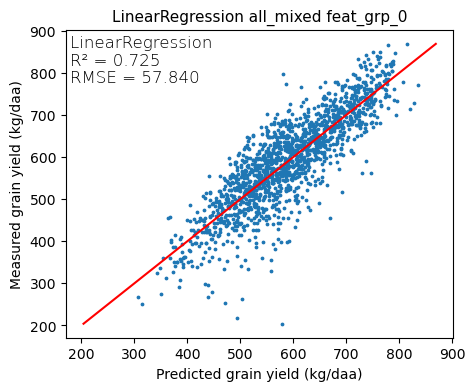

RandomForestRegressor(n_jobs=-1, random_state=1)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(n_jobs=-1, random_state=1))])
 RMSE Test: 57.457266        R2 Test: 0.728638
RMSE Train: 21.921674       R2 Train: 0.960628


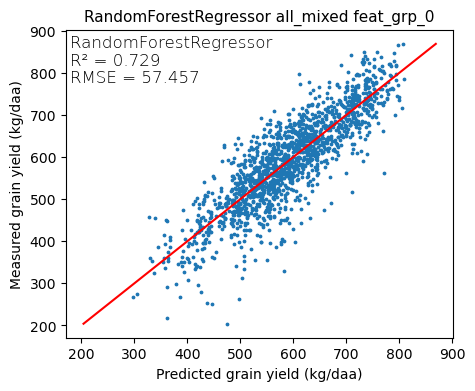

GradientBoostingRegressor(random_state=1)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(random_state=1))])
 RMSE Test: 58.106775        R2 Test: 0.722469
RMSE Train: 50.445685       R2 Train: 0.791509


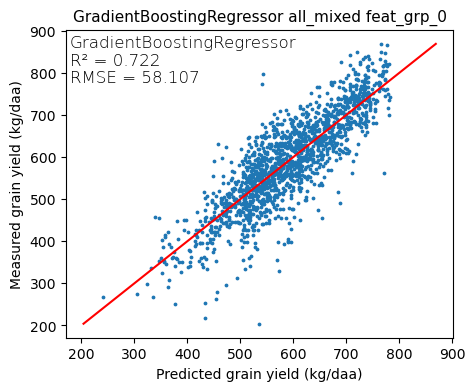

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


KeyboardInterrupt: 

In [36]:
temp_list = [x for x in all_df_now if not 'Robot' in x]

# Making list of df for conct before training
# This is different form list of srtings, as this is a list of actual dataframes
df_list = []
for x in temp_list:
    df_list.append(locals()[x])

df_ = pd.concat(df_list)

# Shuffeling all the items
df_shuffle = df_.sample(frac=1, random_state=1).reset_index(drop=True)

X = df_shuffle[training_features]
y = df_shuffle[target_features].values.ravel()
groups = df_shuffle[group_feature].values.ravel()

gkf = list(GroupKFold(n_splits=6).split(X, y, groups))
# gkf = list(StratifiedGroupKFold(n_splits=6, shuffle=True, random_state=1).split(X, y, groups))

#     Getting scores using cross_val_score
for model in models:
    save_suffix='all_mixed'
    train_field='all_mix'
    test_field='all_mix'
    scatter_title = save_suffix
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.33, random_state=1)

    scatter_params = [scatter_plot, scatter_title, scatter_save, export_path_plots, feature_counter, 
                      scatter_marker_size, scatter_fig_size]
    importances, RMSE_test_temp, RMSE_train_temp, R2_test_temp, R2_train_temp, GKF_CV_temp, y_pred = training_regr(
        model, X_train, y_train, X_test, y_test, scatter_params)
    

#     importances, RMSE_test_temp, RMSE_train_temp, R2_test_temp, R2_train_temp, GKF_CV_temp = training_gkf_std(
#         model, X, y, gkf)
    if importances is not None:
        plot_feat_imp(feature_importance=importances,
                      model=model,
                      train_feat=training_features,
                      threshold=threshold_all,
                      sort_feat=sort_feature_imp,
                      show_plot=show_feat_imp_plot,
                      save_plot=save_feat_imp_plot,
                      export_path=export_path_plots,
                      save_suffix=save_suffix)
    if save_results_now:
        save_results(model=model,
                     agg_method=agg_method,
                     train_field=train_field,
                     test_field=test_field,
                     features_all=[training_features,
                                   base_indices,
                                   spectral_indices_all,
                                   spectral_indices,
                                   weather_features, export_path],
                     importances=importances,
                     RMSE_test=RMSE_test_temp,
                     RMSE_train=RMSE_train_temp,
                     R2_test=R2_test_temp,
                     R2_train=R2_train_temp,
                     GKF_CV=GKF_CV_temp)

### Within same datasets:

Graminor_2019_Simps
Graminor_2019_Simps
LinearRegression
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])
 RMSE Test: 36.032547        R2 Test: 0.464787
RMSE Train: 35.182767       R2 Train: 0.520350


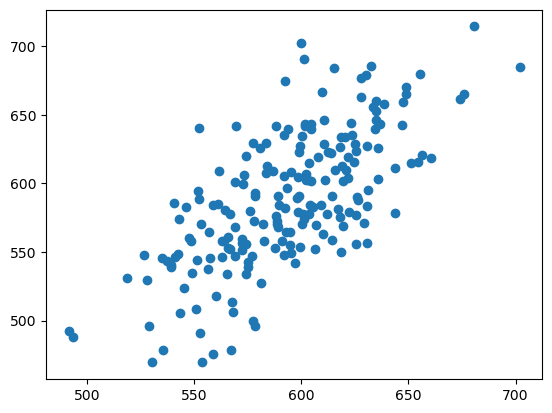

Graminor_2019_Simps
RandomForestRegressor(n_jobs=-1, random_state=1)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(n_jobs=-1, random_state=1))])
 RMSE Test: 40.100095        R2 Test: 0.337131
RMSE Train: 15.114308       R2 Train: 0.911480


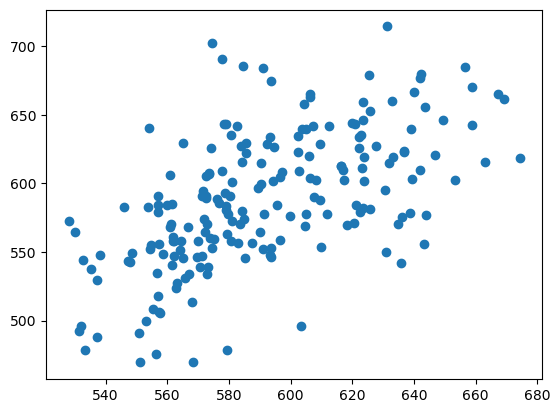

Graminor_2019_Simps
GradientBoostingRegressor(random_state=1)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(random_state=1))])
 RMSE Test: 40.358897        R2 Test: 0.328547
RMSE Train: 19.706448       R2 Train: 0.849519


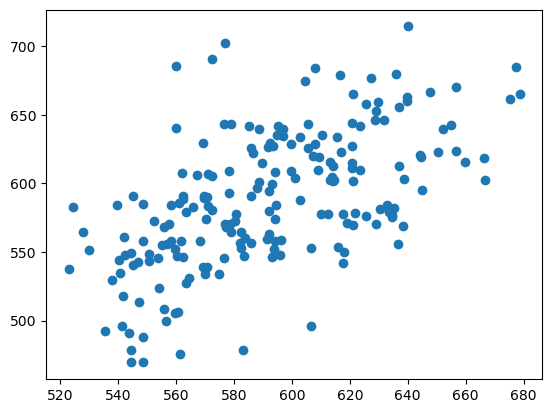

Graminor_2019_Simps


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 264691.31382169, tolerance: 103.48564976923998
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0, max_iter=50000, random_state=1, selection='random')
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso',
                 Lasso(alpha=0, max_iter=50000, random_state=1,
                       selection='random'))])
 RMSE Test: 36.920466        R2 Test: 0.438084
RMSE Train: 36.333954       R2 Train: 0.488448


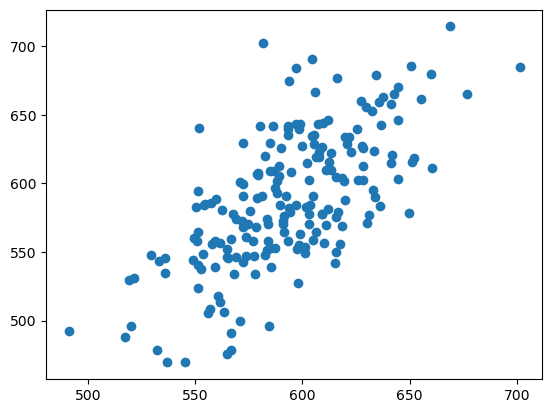

Graminor_2020_Simps
Graminor_2020_Simps
LinearRegression
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])
 RMSE Test: 41.158693        R2 Test: 0.827517
RMSE Train: 41.754693       R2 Train: 0.825795


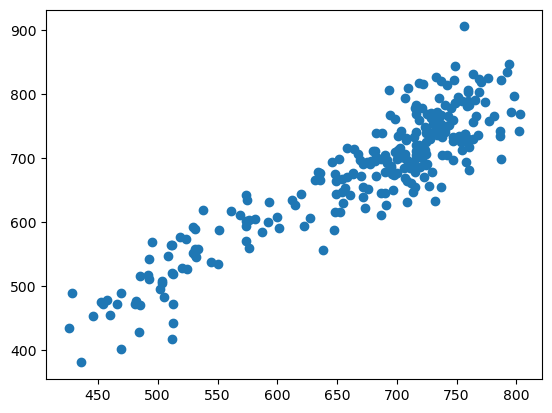

Graminor_2020_Simps
RandomForestRegressor(n_jobs=-1, random_state=1)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(n_jobs=-1, random_state=1))])
 RMSE Test: 45.897548        R2 Test: 0.785512
RMSE Train: 16.891629       R2 Train: 0.971490


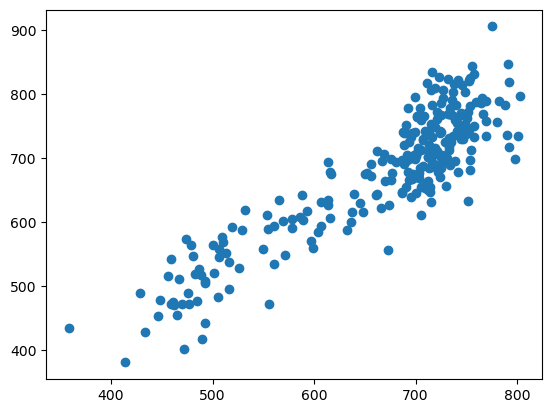

Graminor_2020_Simps
GradientBoostingRegressor(random_state=1)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(random_state=1))])
 RMSE Test: 46.942331        R2 Test: 0.775636
RMSE Train: 26.423200       R2 Train: 0.930238


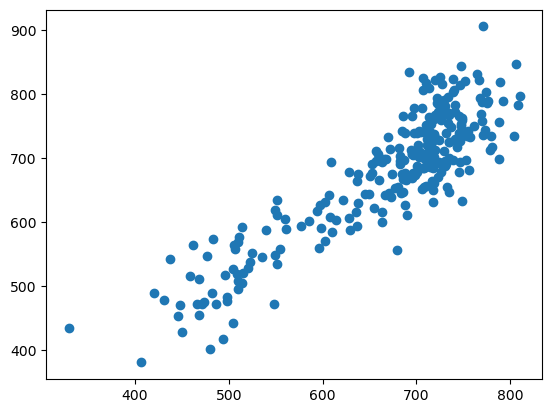

Graminor_2020_Simps


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 474513.7134483223, tolerance: 535.4318830938421
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0, max_iter=50000, random_state=1, selection='random')
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso',
                 Lasso(alpha=0, max_iter=50000, random_state=1,
                       selection='random'))])
 RMSE Test: 41.397710        R2 Test: 0.825508
RMSE Train: 42.117491       R2 Train: 0.822755


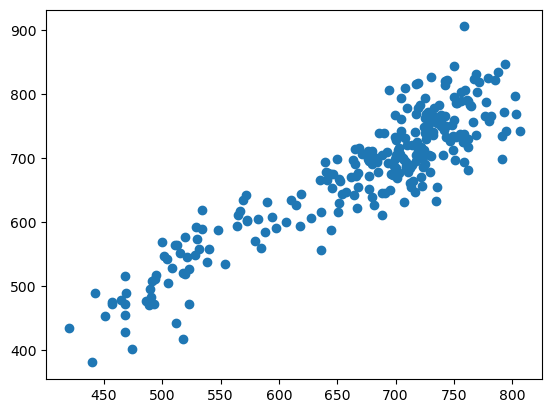

Masbasis_2019_Simps
Masbasis_2019_Simps
LinearRegression
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])
 RMSE Test: 39.561558        R2 Test: 0.776594
RMSE Train: 42.612440       R2 Train: 0.745712


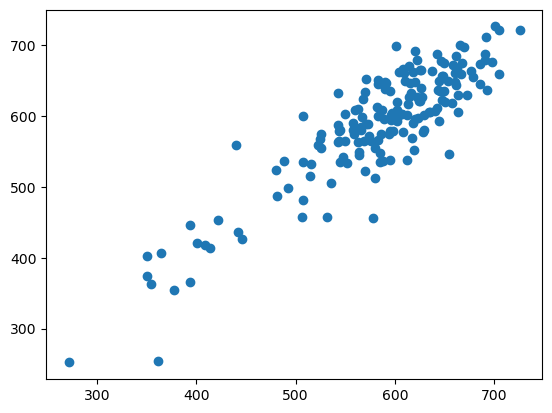

Masbasis_2019_Simps
RandomForestRegressor(n_jobs=-1, random_state=1)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(n_jobs=-1, random_state=1))])
 RMSE Test: 44.134453        R2 Test: 0.721962
RMSE Train: 20.742855       R2 Train: 0.939745


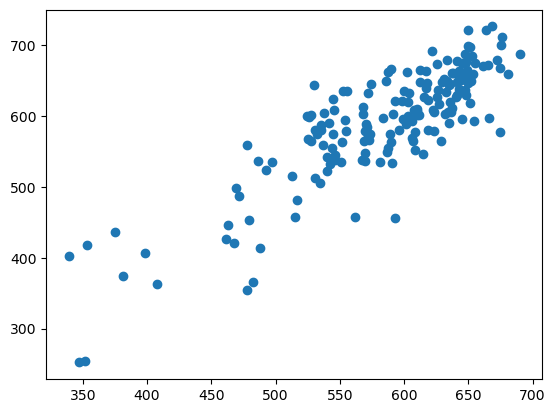

Masbasis_2019_Simps
GradientBoostingRegressor(random_state=1)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(random_state=1))])
 RMSE Test: 44.161719        R2 Test: 0.721618
RMSE Train: 21.302870       R2 Train: 0.936448


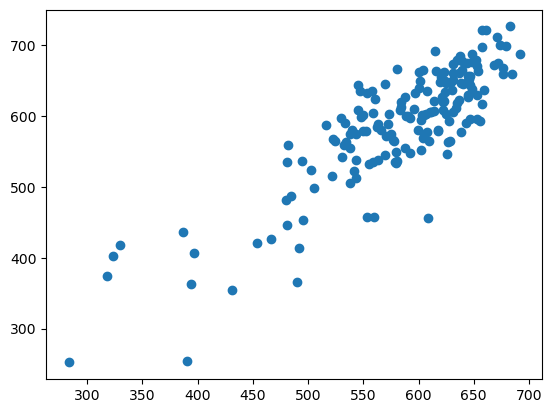

Masbasis_2019_Simps


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 334468.38511121453, tolerance: 249.21403680356585
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0, max_iter=50000, random_state=1, selection='random')
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso',
                 Lasso(alpha=0, max_iter=50000, random_state=1,
                       selection='random'))])
 RMSE Test: 38.767275        R2 Test: 0.785474
RMSE Train: 43.780410       R2 Train: 0.731581


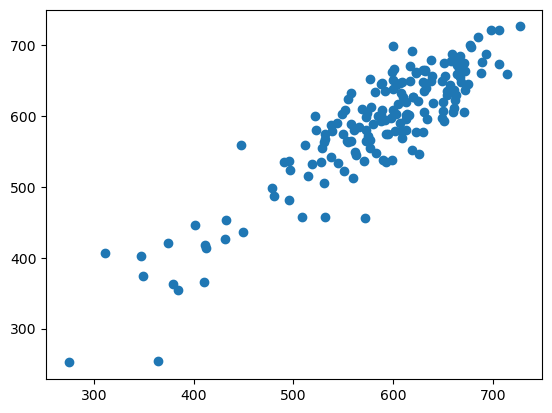

Masbasis_2020_Simps
Masbasis_2020_Simps
LinearRegression
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])
 RMSE Test: 135.546780        R2 Test: -0.767767
RMSE Train: 55.332098       R2 Train: 0.646044


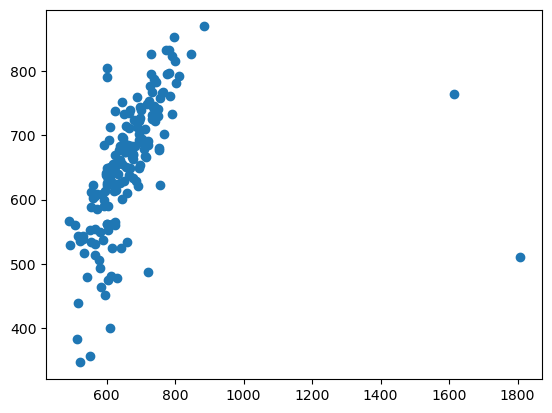

Masbasis_2020_Simps
RandomForestRegressor(n_jobs=-1, random_state=1)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(n_jobs=-1, random_state=1))])
 RMSE Test: 69.204076        R2 Test: 0.539203
RMSE Train: 25.806543       R2 Train: 0.923006


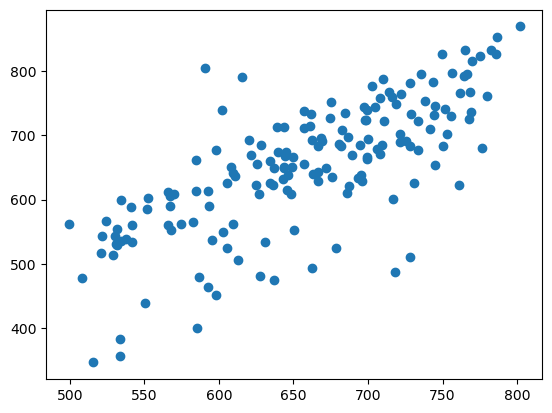

Masbasis_2020_Simps
GradientBoostingRegressor(random_state=1)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(random_state=1))])
 RMSE Test: 68.561188        R2 Test: 0.547724
RMSE Train: 27.199467       R2 Train: 0.914471


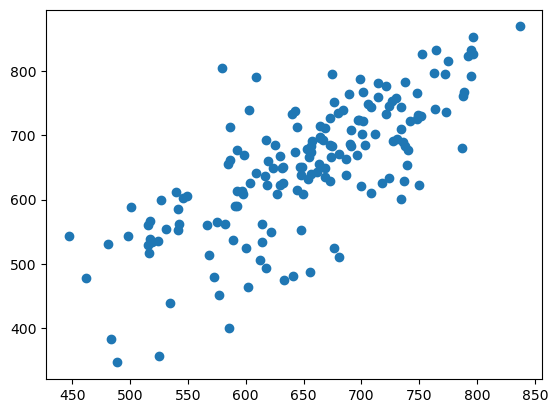

Masbasis_2020_Simps


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 542519.8732033528, tolerance: 294.0928572535139
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0, max_iter=50000, random_state=1, selection='random')
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso',
                 Lasso(alpha=0, max_iter=50000, random_state=1,
                       selection='random'))])
 RMSE Test: 97.953559        R2 Test: 0.076819
RMSE Train: 56.491534       R2 Train: 0.631055


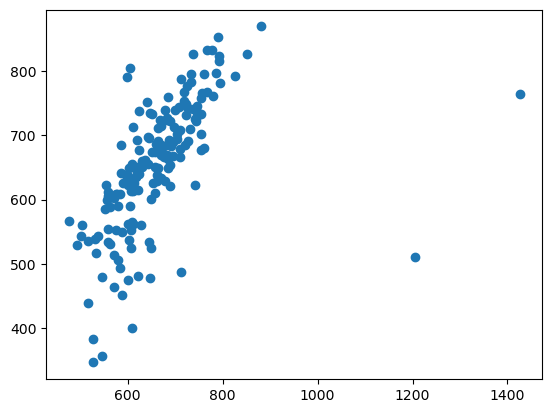

Robot_2020_Simps
Robot_2020_Simps
LinearRegression
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])
 RMSE Test: 90.066674        R2 Test: 0.278020
RMSE Train: 27.979067       R2 Train: 0.913194


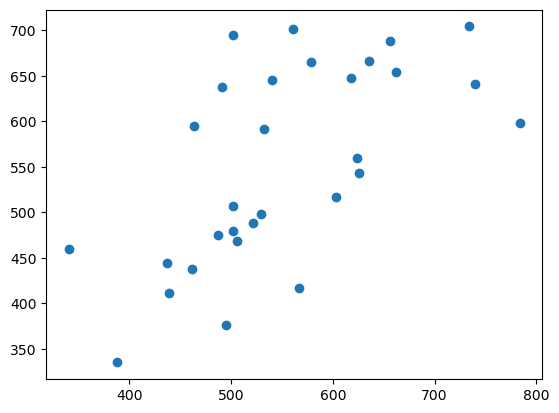

Robot_2020_Simps
RandomForestRegressor(n_jobs=-1, random_state=1)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(n_jobs=-1, random_state=1))])
 RMSE Test: 53.394579        R2 Test: 0.746258
RMSE Train: 17.368439       R2 Train: 0.966549


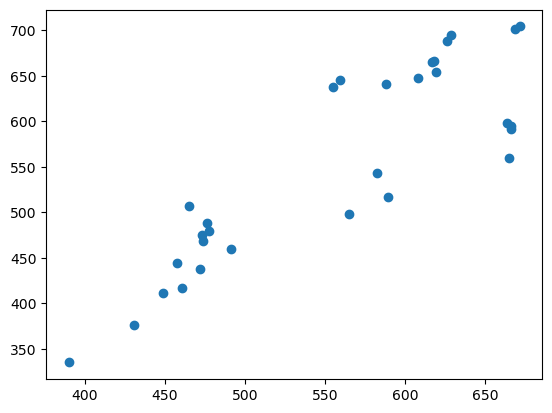

Robot_2020_Simps
GradientBoostingRegressor(random_state=1)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(random_state=1))])
 RMSE Test: 51.489769        R2 Test: 0.764040
RMSE Train: 2.076772       R2 Train: 0.999522


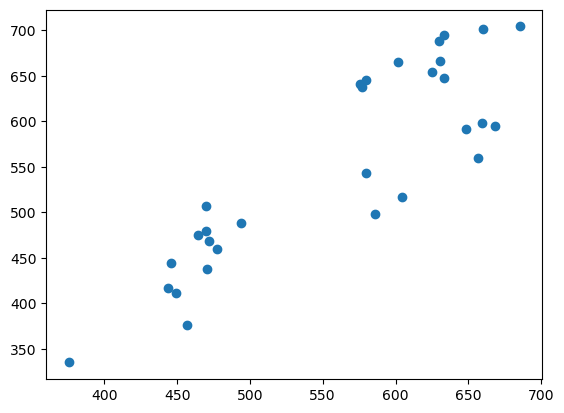

Robot_2020_Simps


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0, max_iter=50000, random_state=1, selection='random')
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso',
                 Lasso(alpha=0, max_iter=50000, random_state=1,
                       selection='random'))])
 RMSE Test: 71.530378        R2 Test: 0.544616
RMSE Train: 31.357197       R2 Train: 0.890967


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28514.939836985413, tolerance: 52.30495896039357
  model = cd_fast.enet_coordinate_descent(


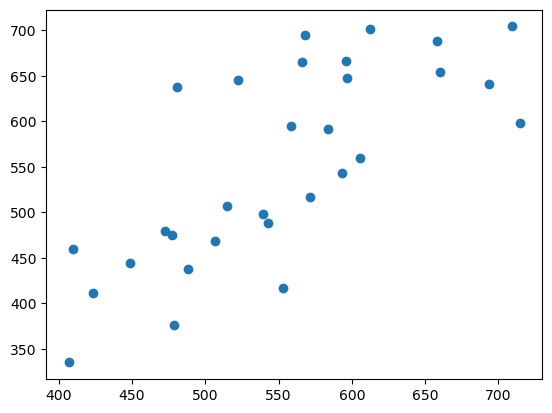

Staur_2019_Simps
Staur_2019_Simps
LinearRegression
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])
 RMSE Test: 68.890782        R2 Test: 0.485269
RMSE Train: 65.415415       R2 Train: 0.520281


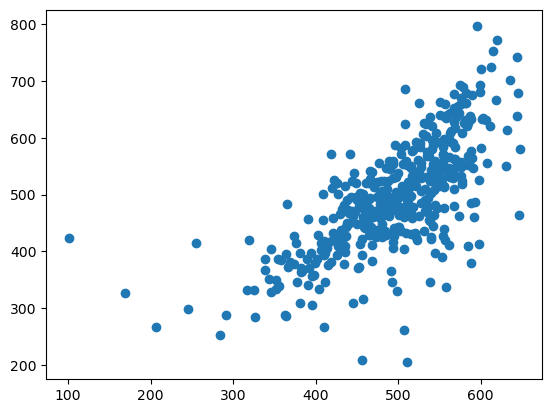

Staur_2019_Simps
RandomForestRegressor(n_jobs=-1, random_state=1)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(n_jobs=-1, random_state=1))])
 RMSE Test: 70.146382        R2 Test: 0.466335
RMSE Train: 26.504964       R2 Train: 0.921244


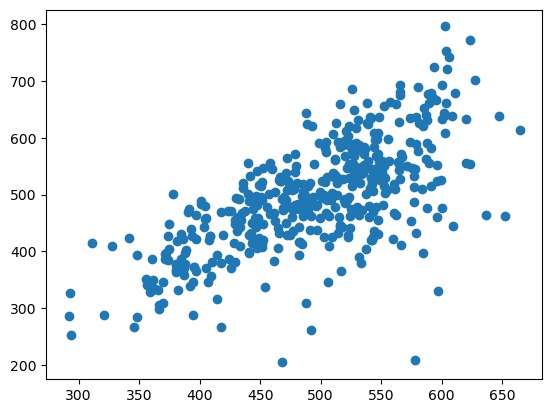

Staur_2019_Simps
GradientBoostingRegressor(random_state=1)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(random_state=1))])
 RMSE Test: 70.824221        R2 Test: 0.455971
RMSE Train: 44.365398       R2 Train: 0.779344


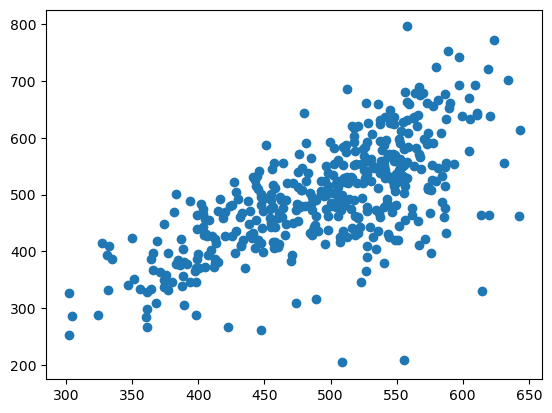

Staur_2019_Simps


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1967586.3121593879, tolerance: 793.0034866484776
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0, max_iter=50000, random_state=1, selection='random')
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso',
                 Lasso(alpha=0, max_iter=50000, random_state=1,
                       selection='random'))])
 RMSE Test: 70.336970        R2 Test: 0.463431
RMSE Train: 66.532067       R2 Train: 0.503764


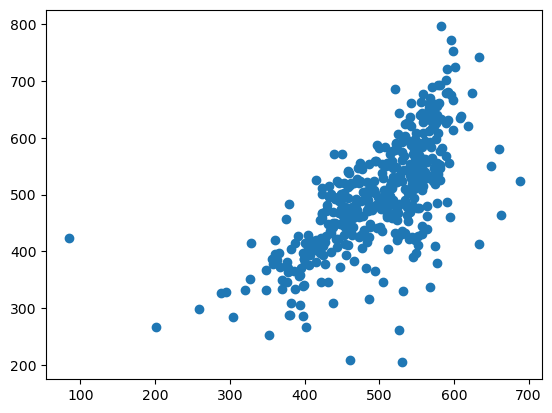

Staur_2020_Simps
Staur_2020_Simps
LinearRegression
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])
 RMSE Test: 50.716306        R2 Test: 0.659665
RMSE Train: 44.580313       R2 Train: 0.740474


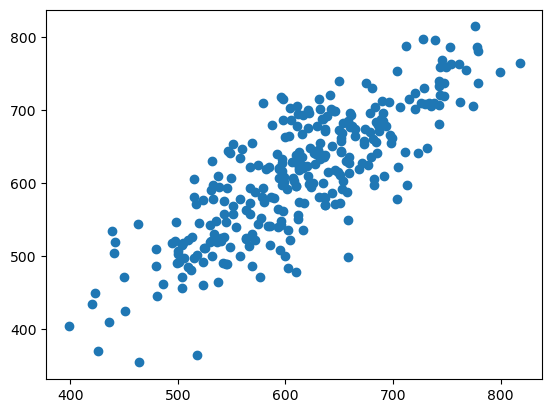

Staur_2020_Simps
RandomForestRegressor(n_jobs=-1, random_state=1)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(n_jobs=-1, random_state=1))])
 RMSE Test: 53.644002        R2 Test: 0.619238
RMSE Train: 18.250727       R2 Train: 0.956503


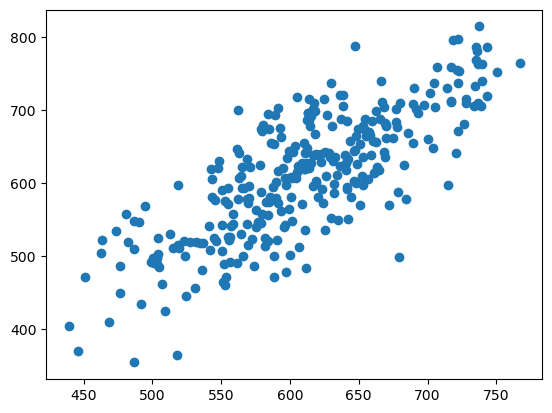

Staur_2020_Simps
GradientBoostingRegressor(random_state=1)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(random_state=1))])
 RMSE Test: 53.922145        R2 Test: 0.615279
RMSE Train: 29.548419       R2 Train: 0.885985


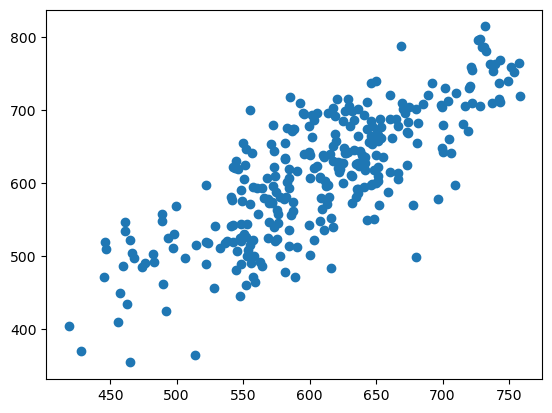

Staur_2020_Simps


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 619095.138915687, tolerance: 471.7223576686701
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0, max_iter=50000, random_state=1, selection='random')
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso',
                 Lasso(alpha=0, max_iter=50000, random_state=1,
                       selection='random'))])
 RMSE Test: 49.130975        R2 Test: 0.680610
RMSE Train: 44.833572       R2 Train: 0.737517


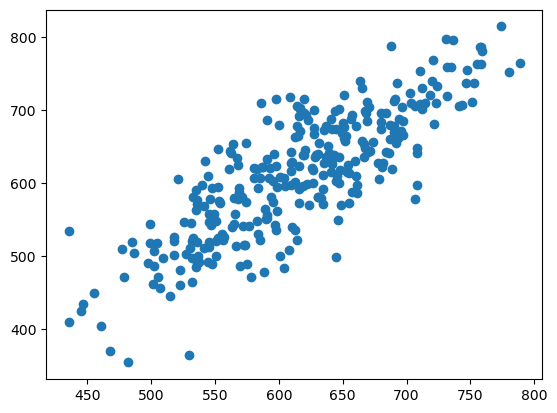

In [38]:
# Iterating through all possible permutations of the fields dataset
for df in all_df_now:
    df_ = locals()[df].copy()

    X = df_[training_features]
    y = df_[target_features].values.ravel()
    groups = df_[group_feature].values.ravel()

    gkf = list(GroupKFold(n_splits=6).split(X, y, groups))
    print(df)
    #     Getting scores using cross_val_score
    for model in models:
        print(df)
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.33, random_state=1)

        importances, RMSE_test_temp, RMSE_train_temp, R2_test_temp, R2_train_temp, GKF_CV_temp, y_pred = training_regr(
            model, X_train, y_train, X_test, y_test, scatter=scatter_plot)

#         importances, RMSE_test_temp, RMSE_train_temp, R2_test_temp, R2_train_temp, GKF_CV_temp = training_gkf_std(
#             model, X, y, gkf)
        if importances is not None:
            plot_feat_imp(feature_importance=importances,
                          model=model,
                          train_feat=training_features,
                          threshold=threshold_all,
                          sort_feat=sort_feature_imp,
                          show_plot=show_feat_imp_plot,
                          save_plot=save_feat_imp_plot,
                          export_path=export_path_plots,
                          save_suffix=df+'_66-33')
        if save_results_now:
            save_results(model=model,
                         agg_method=agg_method,
                         train_field=df,
                         test_field=df,
                         features_all=[training_features,
                                       base_indices,
                                       spectral_indices_all,
                                       spectral_indices,
                                       weather_features, export_path],
                         importances=importances,
                         RMSE_test=RMSE_test_temp,
                         RMSE_train=RMSE_train_temp,
                         R2_test=R2_test_temp,
                         R2_train=R2_train_temp,
                         GKF_CV=GKF_CV_temp)

### One against all - one2one

In [35]:
# # Iterating through all possible permutations of the fields dataset

# for i in itertools.permutations(all_df_now, 2):
#     train_df = locals()[i[0]].copy()
#     test_df = locals()[i[1]].copy()
    
    
#     X_train = train_df[training_features]
#     y_train = train_df[target_features].values.ravel()
#     X_test = test_df[training_features]
#     y_test = test_df[target_features].values.ravel()
    
#     # Getting scores using cross_val_score
#     for model in models:
#         print('Training: ', i[0],'Test: ', i[1], ' : ', model)
#     importances, RMSE_test_temp, RMSE_train_temp, R2_test_temp, R2_train_temp, GKF_CV_temp, y_pred = training_regr(
#         model, X_train, y_train, X_test, y_test, scatter=scatter_plot)
#         if importances is not None:
#             plot_feat_imp(feature_importance=importances,
#                           model=model,
#                           train_feat=training_features,
#                           threshold=threshold_all,
#                           sort_feat=sort_feature_imp,
#                           show_plot=show_feat_imp_plot,
#                           save_plot=save_feat_imp_plot,
#                           export_path=export_path_plots,
#                           save_suffix=i[0]+'_Vs_'+i[1])
#         if save_results_now:
#             save_results(model=model,
#                          agg_method=agg_method,
#                          train_field=i[0],
#                          test_field=i[1],
#                          features_all=[training_features,
#                                        base_indices,
#                                        spectral_indices_all,
#                                        spectral_indices,
#                                        weather_features, export_path],
#                          importances=importances,
#                          RMSE_test=RMSE_test_temp,
#                          RMSE_train=RMSE_train_temp,
#                          R2_test=R2_test_temp,
#                          R2_train=R2_train_temp,
#                          GKF_CV=GKF_CV_temp)

### One aganist all together

Graminor_2019_Simps ['Graminor_2020_Simps', 'Masbasis_2019_Simps', 'Masbasis_2020_Simps', 'Staur_2019_Simps', 'Staur_2020_Simps']
Training: All   Test:  Graminor_2019_Simps  :  LinearRegression()
LinearRegression
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])
 RMSE Test: 205027084375163.312500        R2 Test: -16597498041838846850629632.000000
RMSE Train: 60.307006       R2 Train: 0.732821


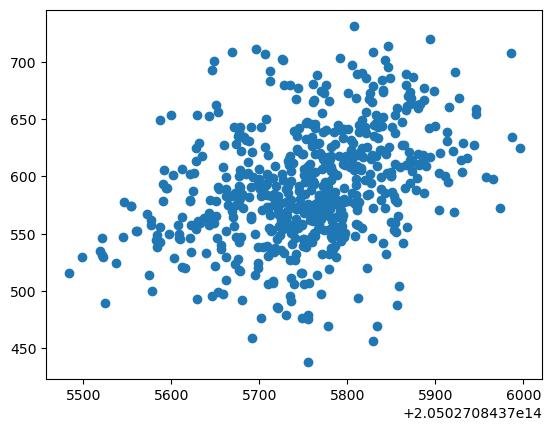

Training: All   Test:  Graminor_2019_Simps  :  RandomForestRegressor(n_jobs=-1, random_state=1)
RandomForestRegressor(n_jobs=-1, random_state=1)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(n_jobs=-1, random_state=1))])
 RMSE Test: 66.170405        R2 Test: -0.728812
RMSE Train: 22.359286       R2 Train: 0.963273


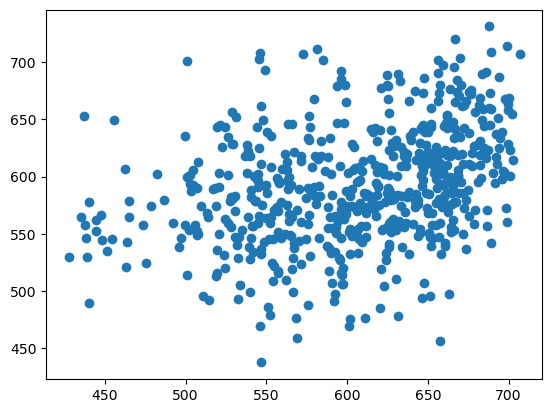

Training: All   Test:  Graminor_2019_Simps  :  GradientBoostingRegressor(random_state=1)
GradientBoostingRegressor(random_state=1)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(random_state=1))])
 RMSE Test: 49.834957        R2 Test: 0.019408
RMSE Train: 52.817766       R2 Train: 0.795060


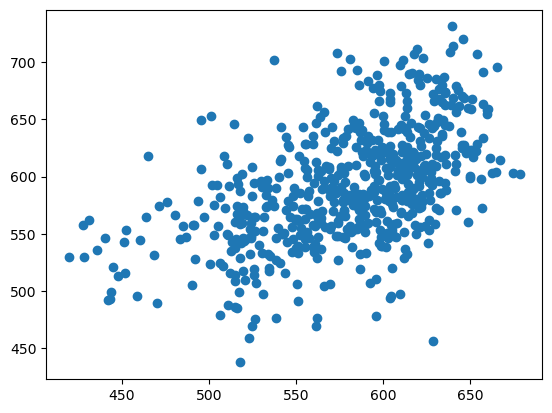

Training: All   Test:  Graminor_2019_Simps  :  Lasso(alpha=0, max_iter=50000, random_state=1, selection='random')


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7487656.680720069, tolerance: 5549.7516368145625
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0, max_iter=50000, random_state=1, selection='random')
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso',
                 Lasso(alpha=0, max_iter=50000, random_state=1,
                       selection='random'))])
 RMSE Test: 88.977367        R2 Test: -2.125930
RMSE Train: 60.606277       R2 Train: 0.730162


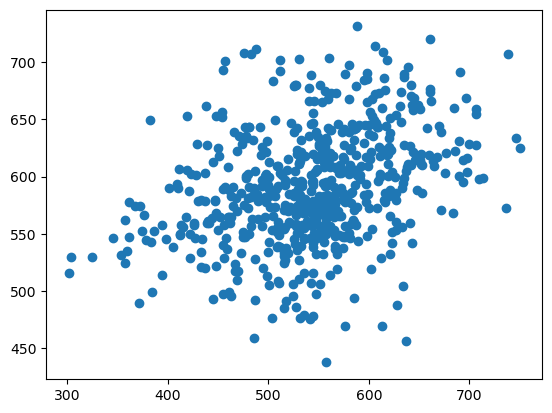

Graminor_2020_Simps ['Graminor_2019_Simps', 'Masbasis_2019_Simps', 'Masbasis_2020_Simps', 'Staur_2019_Simps', 'Staur_2020_Simps']
Training: All   Test:  Graminor_2020_Simps  :  LinearRegression()
LinearRegression
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])
 RMSE Test: 102252983407002.265625        R2 Test: -1051191570318662809157632.000000
RMSE Train: 60.403465       R2 Train: 0.661760


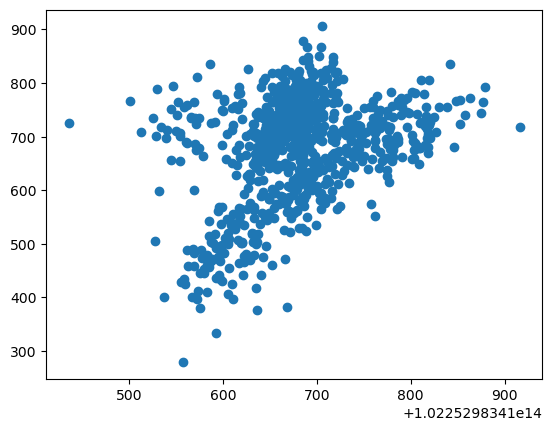

Training: All   Test:  Graminor_2020_Simps  :  RandomForestRegressor(n_jobs=-1, random_state=1)
RandomForestRegressor(n_jobs=-1, random_state=1)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(n_jobs=-1, random_state=1))])
 RMSE Test: 107.498646        R2 Test: -0.161812
RMSE Train: 21.925774       R2 Train: 0.955433


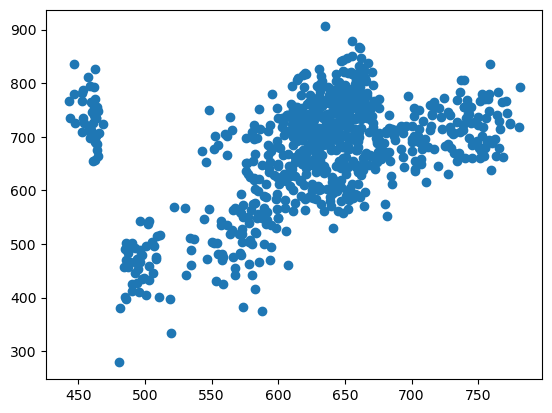

Training: All   Test:  Graminor_2020_Simps  :  GradientBoostingRegressor(random_state=1)
GradientBoostingRegressor(random_state=1)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(random_state=1))])
 RMSE Test: 108.685203        R2 Test: -0.187601
RMSE Train: 51.957751       R2 Train: 0.749734


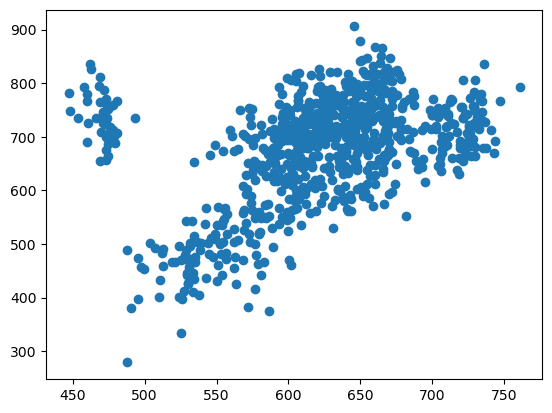

Training: All   Test:  Graminor_2020_Simps  :  Lasso(alpha=0, max_iter=50000, random_state=1, selection='random')


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7128427.150702777, tolerance: 4182.095439561184
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0, max_iter=50000, random_state=1, selection='random')
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso',
                 Lasso(alpha=0, max_iter=50000, random_state=1,
                       selection='random'))])
 RMSE Test: 106.780555        R2 Test: -0.146342
RMSE Train: 60.640665       R2 Train: 0.659098


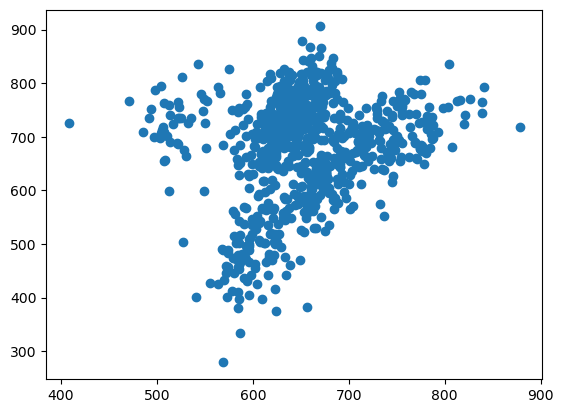

Masbasis_2019_Simps ['Graminor_2019_Simps', 'Graminor_2020_Simps', 'Masbasis_2020_Simps', 'Staur_2019_Simps', 'Staur_2020_Simps']
Training: All   Test:  Masbasis_2019_Simps  :  LinearRegression()
LinearRegression
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])
 RMSE Test: 411963075802741.937500        R2 Test: -23869835149090314323492864.000000
RMSE Train: 59.824120       R2 Train: 0.720958


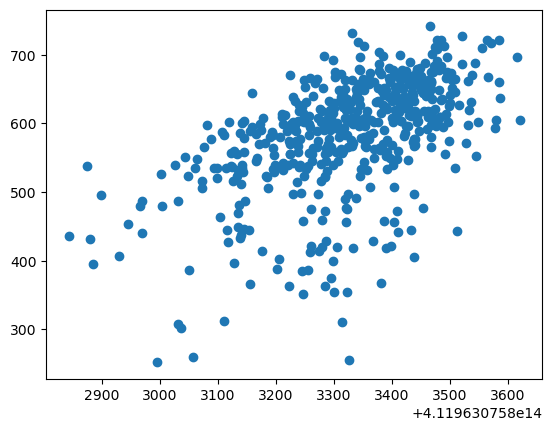

Training: All   Test:  Masbasis_2019_Simps  :  RandomForestRegressor(n_jobs=-1, random_state=1)
RandomForestRegressor(n_jobs=-1, random_state=1)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(n_jobs=-1, random_state=1))])
 RMSE Test: 68.054400        R2 Test: 0.348604
RMSE Train: 21.494689       R2 Train: 0.963977


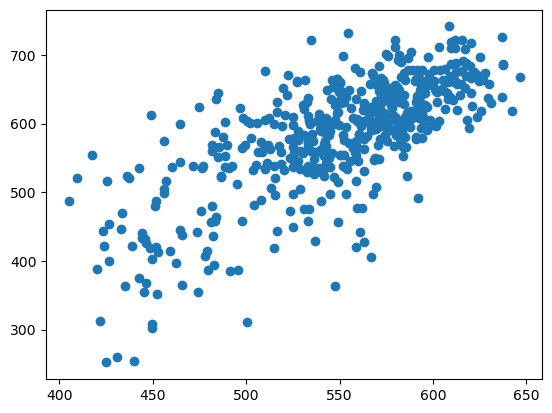

Training: All   Test:  Masbasis_2019_Simps  :  GradientBoostingRegressor(random_state=1)
GradientBoostingRegressor(random_state=1)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(random_state=1))])
 RMSE Test: 61.292318        R2 Test: 0.471622
RMSE Train: 52.274961       R2 Train: 0.786938


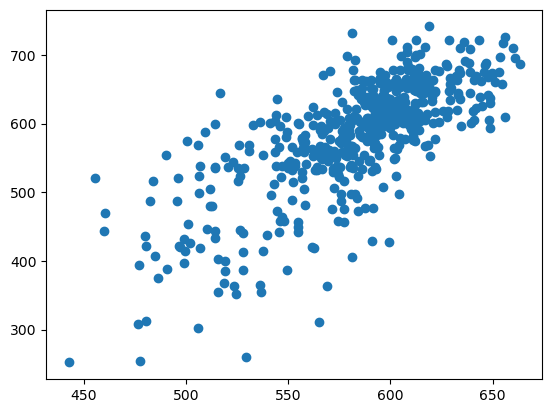

Training: All   Test:  Masbasis_2019_Simps  :  Lasso(alpha=0, max_iter=50000, random_state=1, selection='random')


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7482558.08776033, tolerance: 5327.812097605621
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0, max_iter=50000, random_state=1, selection='random')
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso',
                 Lasso(alpha=0, max_iter=50000, random_state=1,
                       selection='random'))])
 RMSE Test: 134.304958        R2 Test: -1.536979
RMSE Train: 60.021494       R2 Train: 0.719113


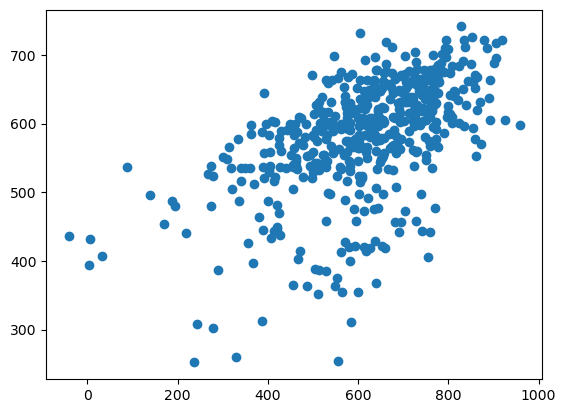

Masbasis_2020_Simps ['Graminor_2019_Simps', 'Graminor_2020_Simps', 'Masbasis_2019_Simps', 'Staur_2019_Simps', 'Staur_2020_Simps']
Training: All   Test:  Masbasis_2020_Simps  :  LinearRegression()
LinearRegression
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])
 RMSE Test: 187387718449801.875000        R2 Test: -3799997315469170935070720.000000
RMSE Train: 57.445294       R2 Train: 0.723327


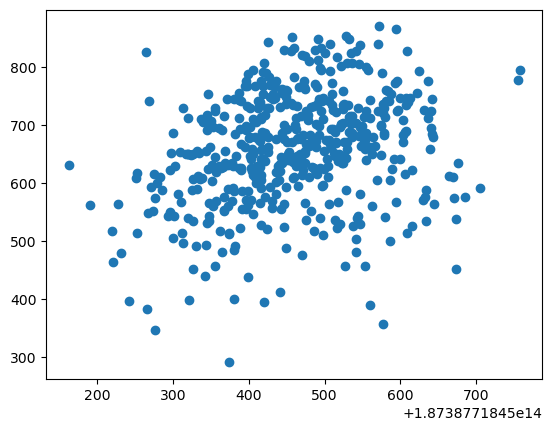

Training: All   Test:  Masbasis_2020_Simps  :  RandomForestRegressor(n_jobs=-1, random_state=1)
RandomForestRegressor(n_jobs=-1, random_state=1)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(n_jobs=-1, random_state=1))])
 RMSE Test: 94.502777        R2 Test: 0.033526
RMSE Train: 20.711624       R2 Train: 0.964034


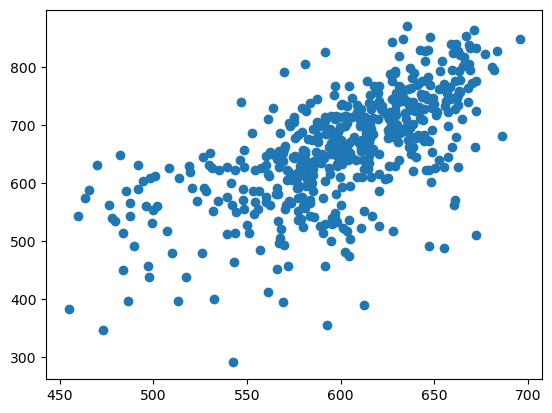

Training: All   Test:  Masbasis_2020_Simps  :  GradientBoostingRegressor(random_state=1)
GradientBoostingRegressor(random_state=1)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(random_state=1))])
 RMSE Test: 98.013715        R2 Test: -0.039620
RMSE Train: 50.390301       R2 Train: 0.787112


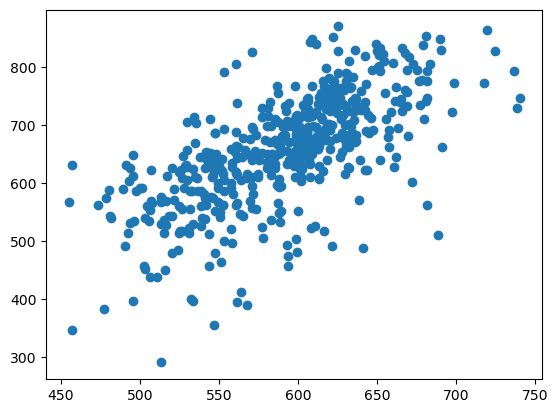

Training: All   Test:  Masbasis_2020_Simps  :  Lasso(alpha=0, max_iter=50000, random_state=1, selection='random')


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7043133.754365837, tolerance: 4971.295328906313
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0, max_iter=50000, random_state=1, selection='random')
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso',
                 Lasso(alpha=0, max_iter=50000, random_state=1,
                       selection='random'))])
 RMSE Test: 96.213201        R2 Test: -0.001775
RMSE Train: 58.134523       R2 Train: 0.716648


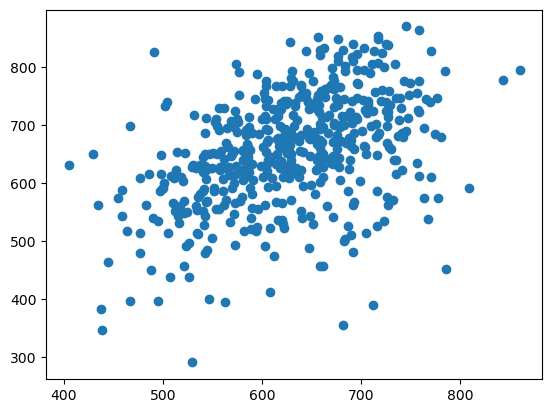

Staur_2019_Simps ['Graminor_2019_Simps', 'Graminor_2020_Simps', 'Masbasis_2019_Simps', 'Masbasis_2020_Simps', 'Staur_2020_Simps']
Training: All   Test:  Staur_2019_Simps  :  LinearRegression()
LinearRegression
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])
 RMSE Test: 632394338729188.375000        R2 Test: -44336364211752548335353856.000000
RMSE Train: 50.274758       R2 Train: 0.710859


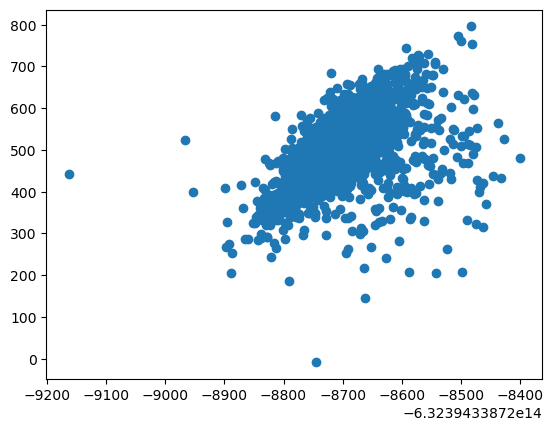

Training: All   Test:  Staur_2019_Simps  :  RandomForestRegressor(n_jobs=-1, random_state=1)
RandomForestRegressor(n_jobs=-1, random_state=1)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(n_jobs=-1, random_state=1))])
 RMSE Test: 148.569950        R2 Test: -1.447068
RMSE Train: 19.173273       R2 Train: 0.957947


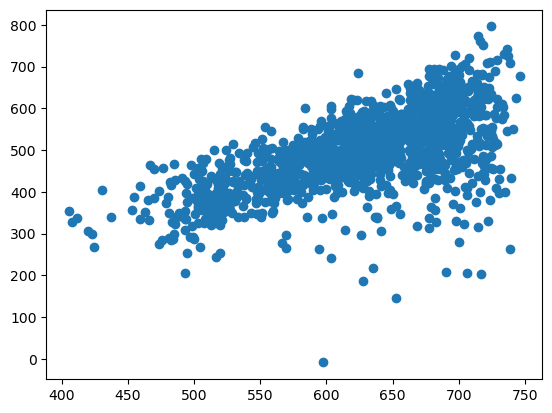

Training: All   Test:  Staur_2019_Simps  :  GradientBoostingRegressor(random_state=1)
GradientBoostingRegressor(random_state=1)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(random_state=1))])
 RMSE Test: 145.739602        R2 Test: -1.354720
RMSE Train: 45.125909       R2 Train: 0.767051


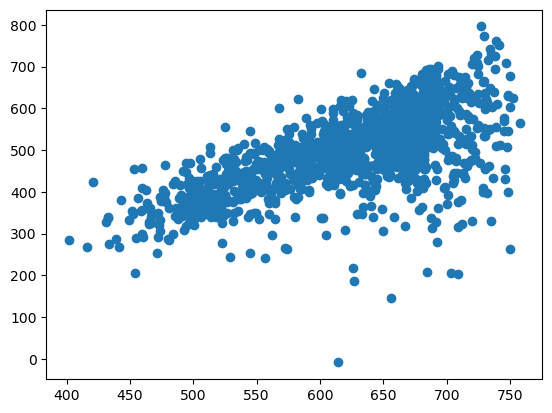

Training: All   Test:  Staur_2019_Simps  :  Lasso(alpha=0, max_iter=50000, random_state=1, selection='random')


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4253833.782288758, tolerance: 2926.6878540821604
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0, max_iter=50000, random_state=1, selection='random')
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso',
                 Lasso(alpha=0, max_iter=50000, random_state=1,
                       selection='random'))])
 RMSE Test: 132.317899        R2 Test: -0.940981
RMSE Train: 50.409516       R2 Train: 0.709307


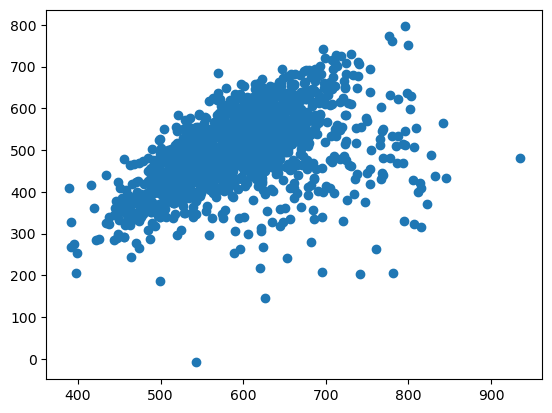

Staur_2020_Simps ['Graminor_2019_Simps', 'Graminor_2020_Simps', 'Masbasis_2019_Simps', 'Masbasis_2020_Simps', 'Staur_2019_Simps']
Training: All   Test:  Staur_2020_Simps  :  LinearRegression()
LinearRegression
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])
 RMSE Test: 271426524368888.906250        R2 Test: -9659663874383708879323136.000000
RMSE Train: 60.452165       R2 Train: 0.722015


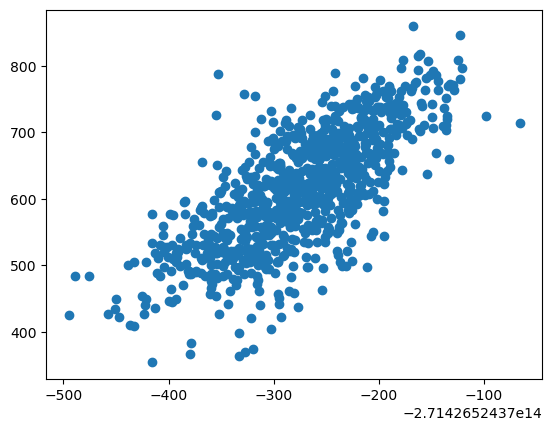

Training: All   Test:  Staur_2020_Simps  :  RandomForestRegressor(n_jobs=-1, random_state=1)
RandomForestRegressor(n_jobs=-1, random_state=1)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(n_jobs=-1, random_state=1))])
 RMSE Test: 60.956664        R2 Test: 0.512808
RMSE Train: 21.783642       R2 Train: 0.963904


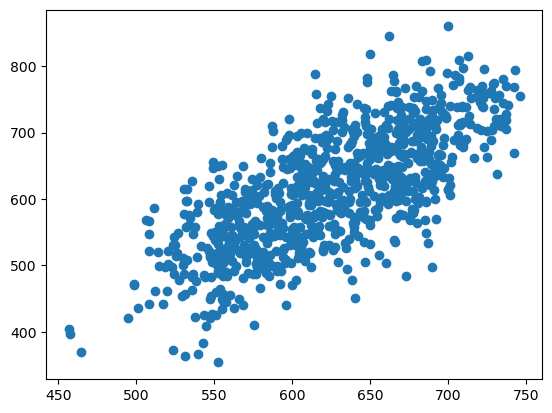

Training: All   Test:  Staur_2020_Simps  :  GradientBoostingRegressor(random_state=1)
GradientBoostingRegressor(random_state=1)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(random_state=1))])
 RMSE Test: 61.934472        R2 Test: 0.497053
RMSE Train: 51.684671       R2 Train: 0.796801


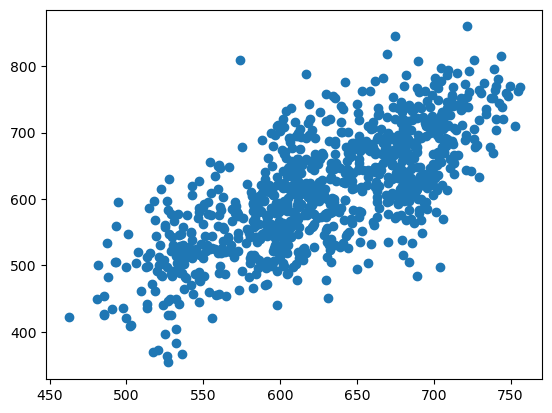

Training: All   Test:  Staur_2020_Simps  :  Lasso(alpha=0, max_iter=50000, random_state=1, selection='random')


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6949785.134822451, tolerance: 4937.734217836703
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0, max_iter=50000, random_state=1, selection='random')
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso',
                 Lasso(alpha=0, max_iter=50000, random_state=1,
                       selection='random'))])
 RMSE Test: 62.656131        R2 Test: 0.485264
RMSE Train: 60.832812       R2 Train: 0.718503


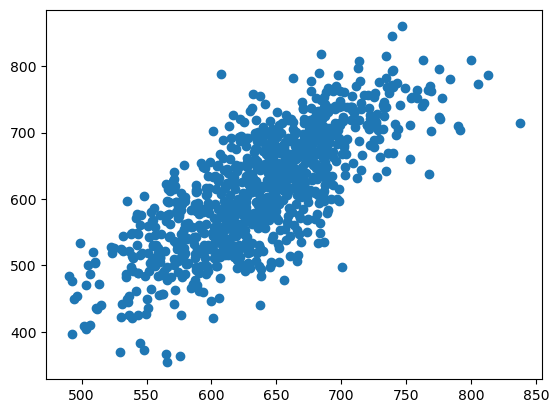

In [39]:
# Iterating through all possible permutations of the fields dataset
for df in all_df_now:
    if 'Robot' not in df:
        temp_list = [
            x for x in all_df_now if not 'Robot' in x if not df in x
        ]
        print(df, temp_list)

        # Making list of df for conct before training
        # This is different form list of srtings, as this is a list of actual dataframes
        train_df_list = []
        for x in temp_list:
            train_df_list.append(locals()[x])

        train_df = pd.concat(train_df_list)
        test_df = locals()[df].copy()

        X_train = train_df[training_features]
        y_train = train_df[target_features].values.ravel()
        X_test = test_df[training_features]
        y_test = test_df[target_features].values.ravel()

        # Getting scores using cross_val_score
        for model in models:
            print('Training: All  ', 'Test: ', df, ' : ', model)
            importances, RMSE_test_temp, RMSE_train_temp, R2_test_temp, R2_train_temp, GKF_CV_temp, y_pred = training_regr(
                model, X_train, y_train, X_test, y_test, scatter=scatter_plot)
        if importances is not None:
            plot_feat_imp(feature_importance=importances,
                          model=model,
                          train_feat=training_features,
                          threshold=threshold_all,
                          sort_feat=sort_feature_imp,
                          show_plot=show_feat_imp_plot,
                          save_plot=save_feat_imp_plot,
                          export_path=export_path_plots,
                          save_suffix=df+'_Vs_all')
        if save_results_now:
            save_results(model=model,
                         agg_method=agg_method,
                         train_field=temp_list,
                         test_field=df,
                         features_all=[training_features,
                                       base_indices,
                                       spectral_indices_all,
                                       spectral_indices,
                                       weather_features, export_path],
                         importances=importances,
                         RMSE_test=RMSE_test_temp,
                         RMSE_train=RMSE_train_temp,
                         R2_test=R2_test_temp,
                         R2_train=R2_train_temp,
                         GKF_CV=GKF_CV_temp)

### Vollebekk ALL vs Staur ALL

#### Training Staur, Test Vollebekk

Training data: ['Staur_2019_Simps', 'Staur_2020_Simps']
Test data: ['Graminor_2019_Simps', 'Graminor_2020_Simps', 'Masbasis_2019_Simps', 'Masbasis_2020_Simps']
LinearRegression
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])
 RMSE Test: 658.307533        R2 Test: -46.770032
RMSE Train: 61.058506       R2 Train: 0.680698


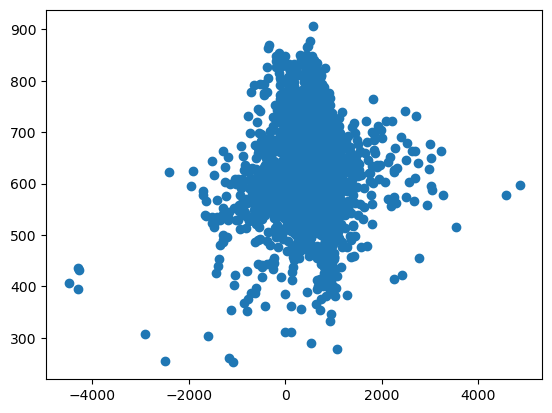

RandomForestRegressor(n_jobs=-1, random_state=1)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(n_jobs=-1, random_state=1))])
 RMSE Test: 98.552023        R2 Test: -0.070604
RMSE Train: 23.008260       R2 Train: 0.954660


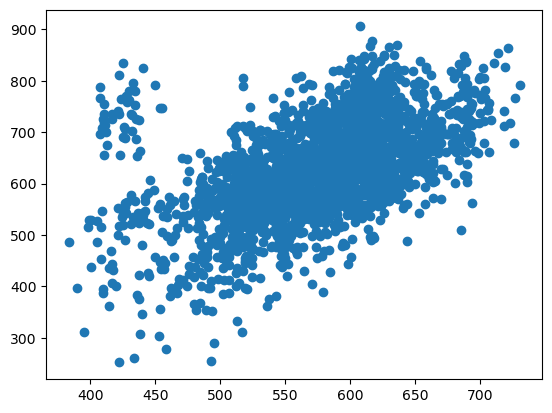

GradientBoostingRegressor(random_state=1)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(random_state=1))])
 RMSE Test: 107.026163        R2 Test: -0.262635
RMSE Train: 50.994605       R2 Train: 0.777280


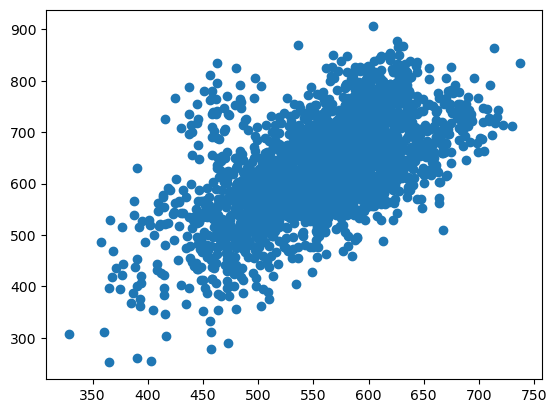

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4343757.415962446, tolerance: 2624.7406633904
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0, max_iter=50000, random_state=1, selection='random')
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso',
                 Lasso(alpha=0, max_iter=50000, random_state=1,
                       selection='random'))])
 RMSE Test: 310.503926        R2 Test: -9.627523
RMSE Train: 62.165528       R2 Train: 0.669014


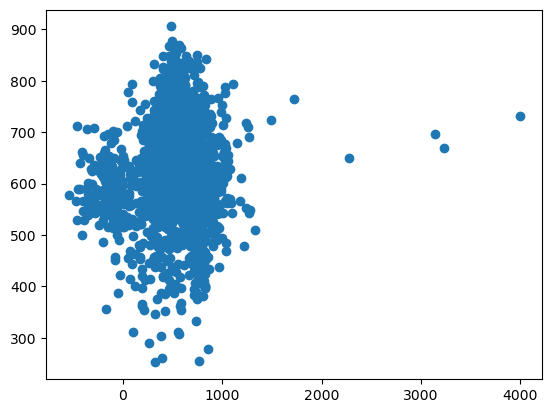

In [40]:
train_str_list, test_str_list = list_test_train_df(all_df_now,
                                                   train_field = 'Staur', 
                                                   test_field = 'Vollebekk', 
                                                   year = 'all')
suffix_title = 'Staur_Vs_Vollebekk_all'

train_df_list = []
test_df_list = []
for x in train_str_list:
    train_df_list.append(locals()[x])
for x in test_str_list:
    test_df_list.append(locals()[x])

if len(train_str_list) > 0 and len(test_str_list) > 0:
    train_df = pd.concat(train_df_list)
    test_df = pd.concat(test_df_list)

    X_train = train_df[training_features]
    y_train = train_df[target_features].values.ravel()
    X_test = test_df[training_features]
    y_test = test_df[target_features].values.ravel()

    # Getting scores using cross_val_score
    for model in models:
        importances, RMSE_test_temp, RMSE_train_temp, R2_test_temp, R2_train_temp, GKF_CV_temp, y_pred = training_regr(
            model, X_train, y_train, X_test, y_test, scatter=scatter_plot)
        if importances is not None:
            plot_feat_imp(feature_importance=importances,
                          model=model,
                          train_feat=training_features,
                          threshold=threshold_all,
                          sort_feat=sort_feature_imp,
                          show_plot=show_feat_imp_plot,
                          save_plot=save_feat_imp_plot,
                          export_path=export_path_plots,
                          save_suffix='Staur_Vs_Vollebekk_all')
        if save_results_now:
            save_results(model=model,
                         agg_method=agg_method,
                         train_field=train_str_list,
                         test_field=test_str_list,
                         features_all=[training_features,
                                       base_indices,
                                       spectral_indices_all,
                                       spectral_indices,
                                       weather_features, export_path],
                         importances=importances,
                         RMSE_test=RMSE_test_temp,
                         RMSE_train=RMSE_train_temp,
                         R2_test=R2_test_temp,
                         R2_train=R2_train_temp,
                         GKF_CV=GKF_CV_temp)

#### Training Vollebekk, Test Staur

Training data: ['Graminor_2019_Simps', 'Graminor_2020_Simps', 'Masbasis_2019_Simps', 'Masbasis_2020_Simps']
Test data: ['Staur_2019_Simps', 'Staur_2020_Simps']
LinearRegression
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])
 RMSE Test: 252884767958877.500000        R2 Test: -5477157754709591174676480.000000
RMSE Train: 49.379366       R2 Train: 0.731225


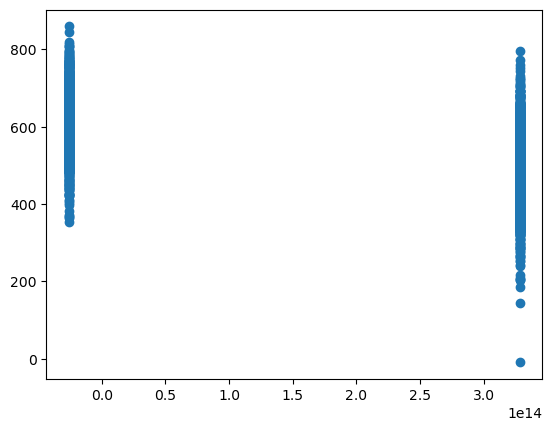

RandomForestRegressor(n_jobs=-1, random_state=1)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(n_jobs=-1, random_state=1))])
 RMSE Test: 122.400370        R2 Test: -0.283144
RMSE Train: 19.328794       R2 Train: 0.958818


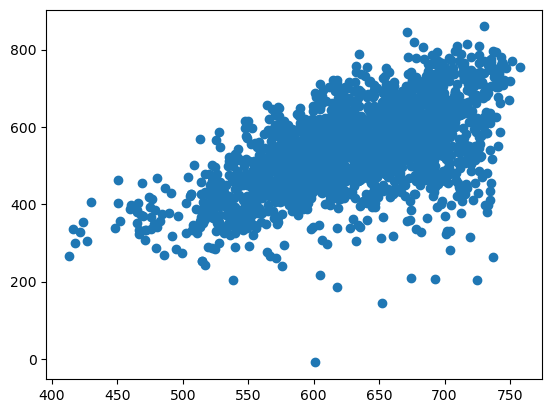

GradientBoostingRegressor(random_state=1)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(random_state=1))])
 RMSE Test: 111.806043        R2 Test: -0.070633
RMSE Train: 42.552010       R2 Train: 0.800410


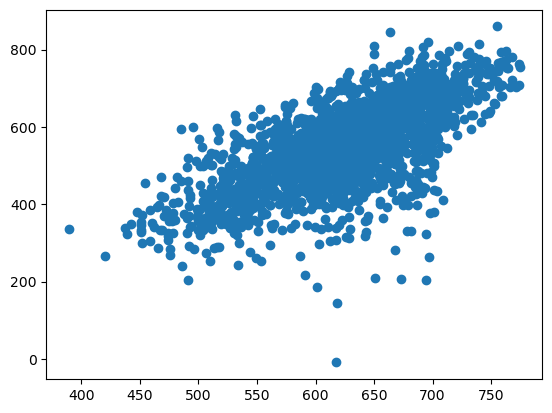

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3001100.952265967, tolerance: 2202.676933668417
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0, max_iter=50000, random_state=1, selection='random')
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso',
                 Lasso(alpha=0, max_iter=50000, random_state=1,
                       selection='random'))])
 RMSE Test: 90.387465        R2 Test: 0.300277
RMSE Train: 49.719982       R2 Train: 0.727504


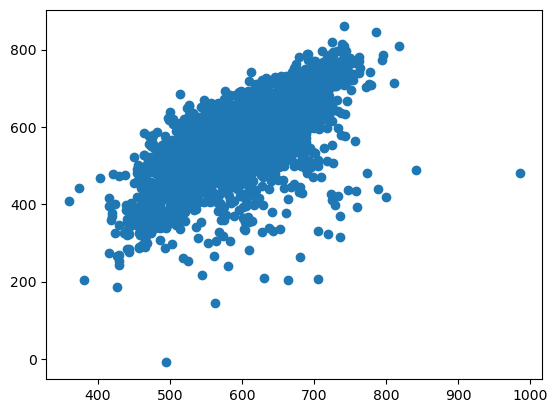

In [41]:
train_str_list, test_str_list = list_test_train_df(all_df_now,
                                                   train_field = 'Vollebekk', 
                                                   test_field = 'Staur', 
                                                   year = 'all')

suffix_title = 'VollebekK_Vs_Staur_all'

train_df_list = []
test_df_list = []
for x in train_str_list:
    train_df_list.append(locals()[x])
for x in test_str_list:
    test_df_list.append(locals()[x])

if len(train_str_list) > 0 and len(test_str_list) > 0:
    train_df = pd.concat(train_df_list)
    test_df = pd.concat(test_df_list)

    X_train = train_df[training_features]
    y_train = train_df[target_features].values.ravel()
    X_test = test_df[training_features]
    y_test = test_df[target_features].values.ravel()

    # Getting scores using cross_val_score
    for model in models:
        importances, RMSE_test_temp, RMSE_train_temp, R2_test_temp, R2_train_temp, GKF_CV_temp, y_pred = training_regr(
            model, X_train, y_train, X_test, y_test, scatter=scatter_plot)
        if importances is not None:
            plot_feat_imp(feature_importance=importances,
                          model=model,
                          train_feat=training_features,
                          threshold=threshold_all,
                          sort_feat=sort_feature_imp,
                          show_plot=show_feat_imp_plot,
                          save_plot=save_feat_imp_plot,
                          export_path=export_path_plots,
                          save_suffix='Staur_Vs_Vollebekk_all')
        if save_results_now:
            save_results(model=model,
                         agg_method=agg_method,
                         train_field=train_str_list,
                         test_field=test_str_list,
                         features_all=[training_features,
                                       base_indices,
                                       spectral_indices_all,
                                       spectral_indices,
                                       weather_features, export_path],
                         importances=importances,
                         RMSE_test=RMSE_test_temp,
                         RMSE_train=RMSE_train_temp,
                         R2_test=R2_test_temp,
                         R2_train=R2_train_temp,
                         GKF_CV=GKF_CV_temp)

### 2020 Vollebekk vs 2020 Staur

#### Training Staur, Test Vollebekk

Training data: ['Staur_2020_Simps']
Test data: ['Graminor_2020_Simps', 'Masbasis_2020_Simps']
LinearRegression
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])
 RMSE Test: 592185890305694.625000        R2 Test: -35936282964040261633572864.000000
RMSE Train: 45.650647       R2 Train: 0.726756


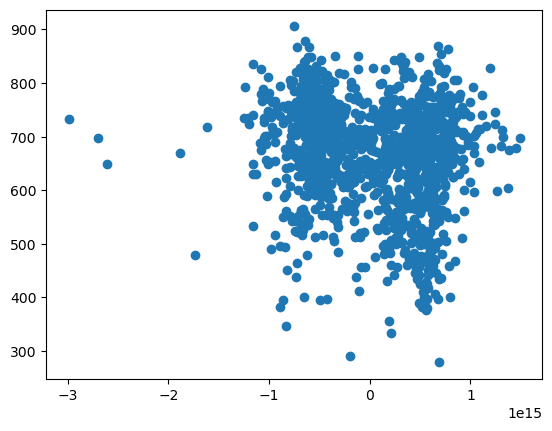

RandomForestRegressor(n_jobs=-1, random_state=1)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(n_jobs=-1, random_state=1))])
 RMSE Test: 106.694613        R2 Test: -0.166546
RMSE Train: 18.878816       R2 Train: 0.953269


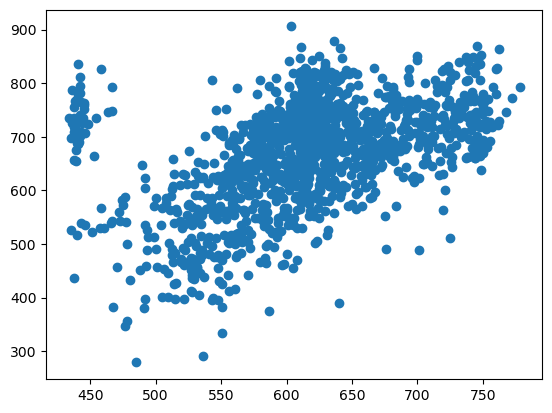

GradientBoostingRegressor(random_state=1)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(random_state=1))])
 RMSE Test: 103.338378        R2 Test: -0.094310
RMSE Train: 34.680891       R2 Train: 0.842298


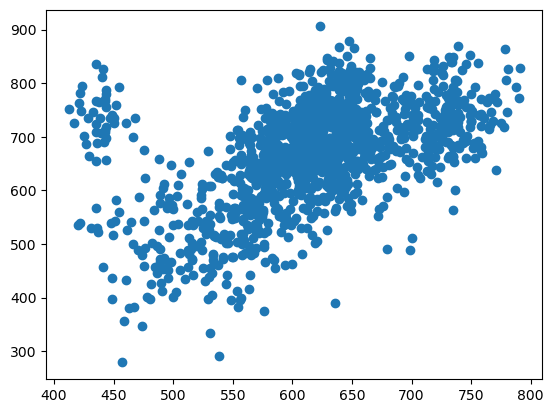

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 975860.2189430546, tolerance: 701.6659209047411
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0, max_iter=50000, random_state=1, selection='random')
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso',
                 Lasso(alpha=0, max_iter=50000, random_state=1,
                       selection='random'))])
 RMSE Test: 193.021212        R2 Test: -2.817923
RMSE Train: 46.059041       R2 Train: 0.721845


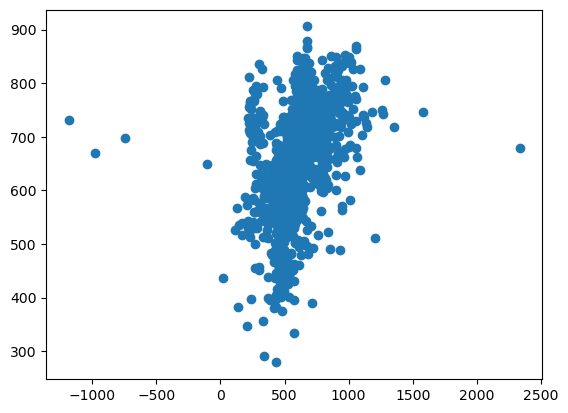

In [42]:
train_str_list, test_str_list = list_test_train_df(all_df_now,
                                                   train_field = 'Staur', 
                                                   test_field = 'Vollebekk', 
                                                   year = '2020')
suffix_title = 'Staur_Vs_Vollebekk_2020'

train_df_list = []
test_df_list = []
for x in train_str_list:
    train_df_list.append(locals()[x])
for x in test_str_list:
    test_df_list.append(locals()[x])

if len(train_str_list) > 0 and len(test_str_list) > 0:
    train_df = pd.concat(train_df_list)
    test_df = pd.concat(test_df_list)

    X_train = train_df[training_features]
    y_train = train_df[target_features].values.ravel()
    X_test = test_df[training_features]
    y_test = test_df[target_features].values.ravel()

    # Getting scores using cross_val_score
    for model in models:
        importances, RMSE_test_temp, RMSE_train_temp, R2_test_temp, R2_train_temp, GKF_CV_temp, y_pred = training_regr(
            model, X_train, y_train, X_test, y_test, scatter=scatter_plot)
        if importances is not None:
            plot_feat_imp(feature_importance=importances,
                          model=model,
                          train_feat=training_features,
                          threshold=threshold_all,
                          sort_feat=sort_feature_imp,
                          show_plot=show_feat_imp_plot,
                          save_plot=save_feat_imp_plot,
                          export_path=export_path_plots,
                          save_suffix='Staur_Vs_Vollebekk_all')
        if save_results_now:
            save_results(model=model,
                         agg_method=agg_method,
                         train_field=train_str_list,
                         test_field=test_str_list,
                         features_all=[training_features,
                                       base_indices,
                                       spectral_indices_all,
                                       spectral_indices,
                                       weather_features, export_path],
                         importances=importances,
                         RMSE_test=RMSE_test_temp,
                         RMSE_train=RMSE_train_temp,
                         R2_test=R2_test_temp,
                         R2_train=R2_train_temp,
                         GKF_CV=GKF_CV_temp)

#### Training Vollebekk, Test Staur

Training data: ['Graminor_2020_Simps', 'Masbasis_2020_Simps']
Test data: ['Staur_2020_Simps']
LinearRegression
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])
 RMSE Test: 2739376455739.634277        R2 Test: -983922475251162284032.000000
RMSE Train: 50.325390       R2 Train: 0.740468


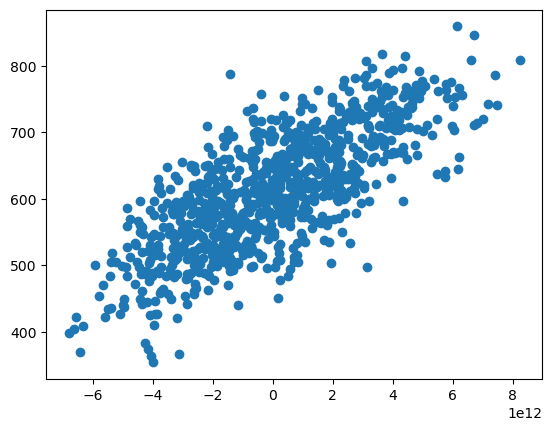

RandomForestRegressor(n_jobs=-1, random_state=1)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(n_jobs=-1, random_state=1))])
 RMSE Test: 77.306392        R2 Test: 0.216411
RMSE Train: 21.255954       R2 Train: 0.953700


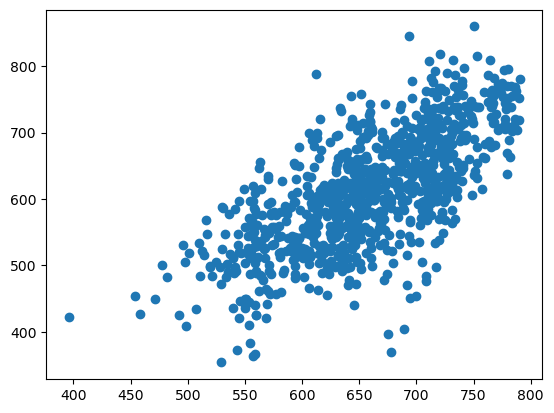

GradientBoostingRegressor(random_state=1)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(random_state=1))])
 RMSE Test: 73.987003        R2 Test: 0.282258
RMSE Train: 40.904310       R2 Train: 0.828543


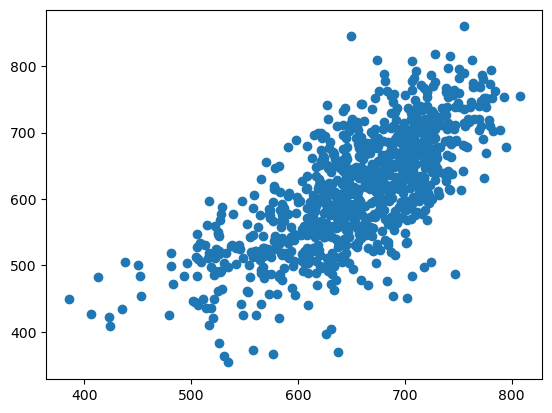

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1743753.3329655854, tolerance: 1275.4356276626495
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0, max_iter=50000, random_state=1, selection='random')
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso',
                 Lasso(alpha=0, max_iter=50000, random_state=1,
                       selection='random'))])
 RMSE Test: 155.131459        R2 Test: -2.155420
RMSE Train: 51.655876       R2 Train: 0.726563


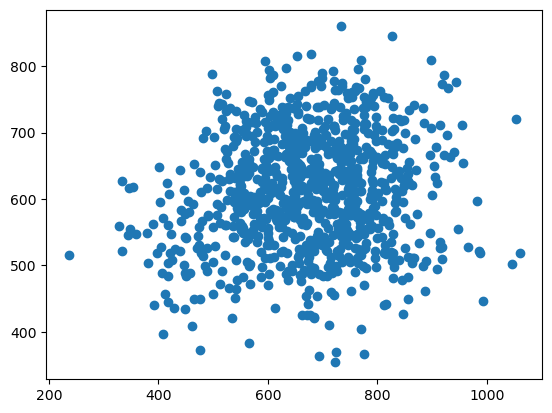

In [43]:
train_str_list, test_str_list = list_test_train_df(all_df_now,
                                                   train_field = 'Vollebekk', 
                                                   test_field = 'Staur', 
                                                   year = '2020')
suffix_title = 'VollebekK_Vs_Staur_2020'

train_df_list = []
test_df_list = []
for x in train_str_list:
    train_df_list.append(locals()[x])
for x in test_str_list:
    test_df_list.append(locals()[x])

if len(train_str_list) > 0 and len(test_str_list) > 0:
    train_df = pd.concat(train_df_list)
    test_df = pd.concat(test_df_list)

    X_train = train_df[training_features]
    y_train = train_df[target_features].values.ravel()
    X_test = test_df[training_features]
    y_test = test_df[target_features].values.ravel()

    # Getting scores using cross_val_score
    for model in models:
        importances, RMSE_test_temp, RMSE_train_temp, R2_test_temp, R2_train_temp, GKF_CV_temp, y_pred = training_regr(
            model, X_train, y_train, X_test, y_test, scatter=scatter_plot)
        if importances is not None:
            plot_feat_imp(feature_importance=importances,
                          model=model,
                          train_feat=training_features,
                          threshold=threshold_all,
                          sort_feat=sort_feature_imp,
                          show_plot=show_feat_imp_plot,
                          save_plot=save_feat_imp_plot,
                          export_path=export_path_plots,
                          save_suffix='Staur_Vs_Vollebekk_all')
        if save_results_now:
            save_results(model=model,
                         agg_method=agg_method,
                         train_field=train_str_list,
                         test_field=test_str_list,
                         features_all=[training_features,
                                       base_indices,
                                       spectral_indices_all,
                                       spectral_indices,
                                       weather_features, export_path],
                         importances=importances,
                         RMSE_test=RMSE_test_temp,
                         RMSE_train=RMSE_train_temp,
                         R2_test=R2_test_temp,
                         R2_train=R2_train_temp,
                         GKF_CV=GKF_CV_temp)

### 2019 Vollebekk vs 2019 Staur

#### Training Staur, Test Vollebekk

Training data: ['Staur_2019_Simps']
Test data: ['Graminor_2019_Simps', 'Masbasis_2019_Simps']
LinearRegression
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])
 RMSE Test: 48827632963109.296875        R2 Test: -509365047873671473922048.000000
RMSE Train: 65.575036       R2 Train: 0.523282


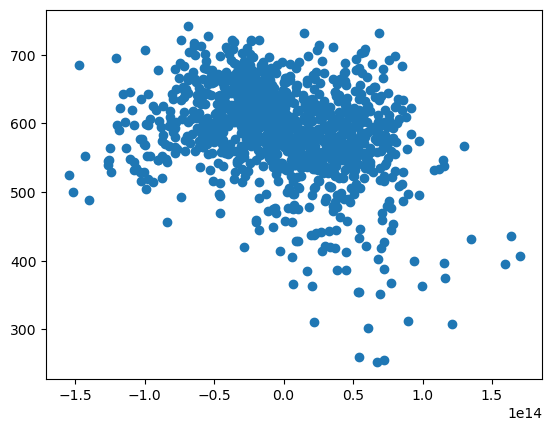

RandomForestRegressor(n_jobs=-1, random_state=1)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(n_jobs=-1, random_state=1))])
 RMSE Test: 120.011332        R2 Test: -2.077105
RMSE Train: 25.675427       R2 Train: 0.926916


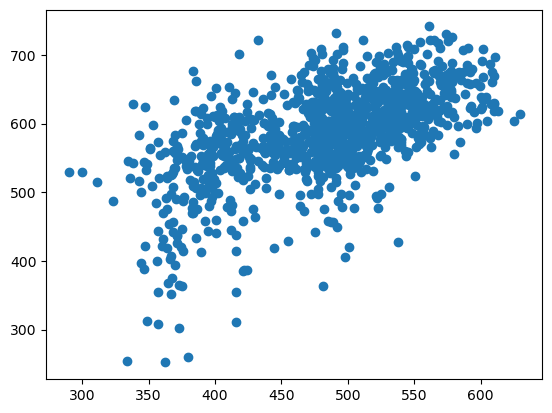

GradientBoostingRegressor(random_state=1)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(random_state=1))])
 RMSE Test: 120.722741        R2 Test: -2.113694
RMSE Train: 49.014328       R2 Train: 0.733664


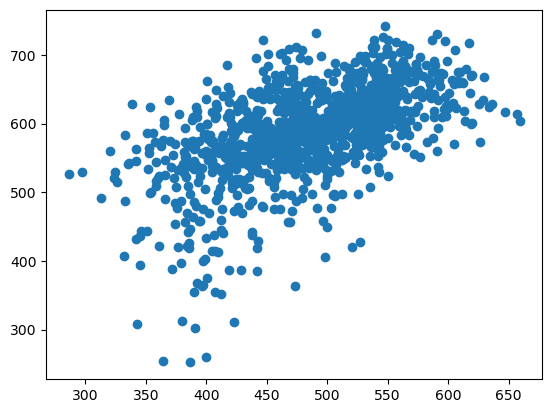

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3002207.9526078897, tolerance: 1197.8817428681998
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0, max_iter=50000, random_state=1, selection='random')
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso',
                 Lasso(alpha=0, max_iter=50000, random_state=1,
                       selection='random'))])
 RMSE Test: 207.553873        R2 Test: -8.203637
RMSE Train: 67.241338       R2 Train: 0.498747


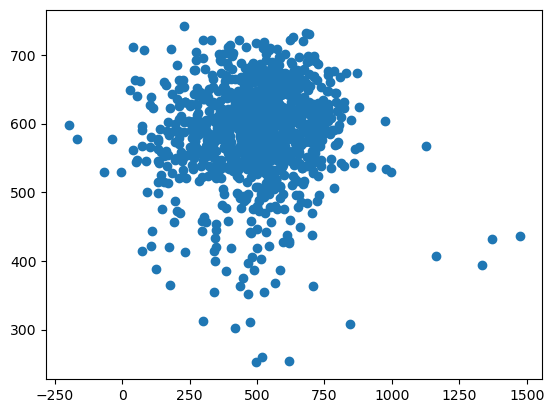

In [44]:
train_str_list, test_str_list = list_test_train_df(all_df_now,
                                                   train_field = 'Staur', 
                                                   test_field = 'Vollebekk', 
                                                   year = '2019')
suffix_title = 'Staur_Vs_Vollebekk_2019'

train_df_list = []
test_df_list = []
for x in train_str_list:
    train_df_list.append(locals()[x])
for x in test_str_list:
    test_df_list.append(locals()[x])

if len(train_str_list) > 0 and len(test_str_list) > 0:
    train_df = pd.concat(train_df_list)
    test_df = pd.concat(test_df_list)

    X_train = train_df[training_features]
    y_train = train_df[target_features].values.ravel()
    X_test = test_df[training_features]
    y_test = test_df[target_features].values.ravel()

    # Getting scores using cross_val_score
    for model in models:
        importances, RMSE_test_temp, RMSE_train_temp, R2_test_temp, R2_train_temp, GKF_CV_temp, y_pred = training_regr(
            model, X_train, y_train, X_test, y_test, scatter=scatter_plot)
        if importances is not None:
            plot_feat_imp(feature_importance=importances,
                          model=model,
                          train_feat=training_features,
                          threshold=threshold_all,
                          sort_feat=sort_feature_imp,
                          show_plot=show_feat_imp_plot,
                          save_plot=save_feat_imp_plot,
                          export_path=export_path_plots,
                          save_suffix='Staur_Vs_Vollebekk_all')
        if save_results_now:
            save_results(model=model,
                         agg_method=agg_method,
                         train_field=train_str_list,
                         test_field=test_str_list,
                         features_all=[training_features,
                                       base_indices,
                                       spectral_indices_all,
                                       spectral_indices,
                                       weather_features, export_path],
                         importances=importances,
                         RMSE_test=RMSE_test_temp,
                         RMSE_train=RMSE_train_temp,
                         R2_test=R2_test_temp,
                         R2_train=R2_train_temp,
                         GKF_CV=GKF_CV_temp)

#### Training Vollebekk, Test Staur

Training data: ['Graminor_2019_Simps', 'Masbasis_2019_Simps']
Test data: ['Staur_2019_Simps']
ok
LinearRegression
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])
 RMSE Test: 147.564233        R2 Test: -1.414050
RMSE Train: 41.902347       R2 Train: 0.624876


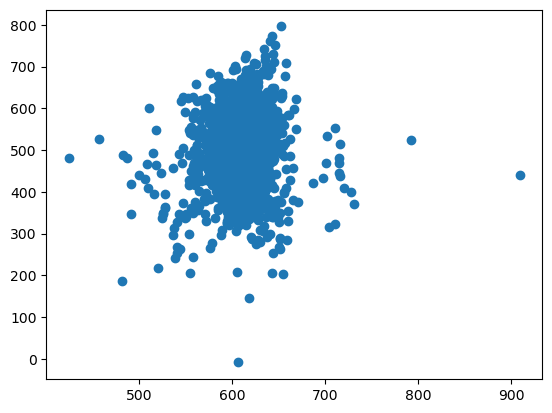

RandomForestRegressor(n_jobs=-1, random_state=1)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(n_jobs=-1, random_state=1))])
 RMSE Test: 120.630272        R2 Test: -0.613232
RMSE Train: 17.237345       R2 Train: 0.936520


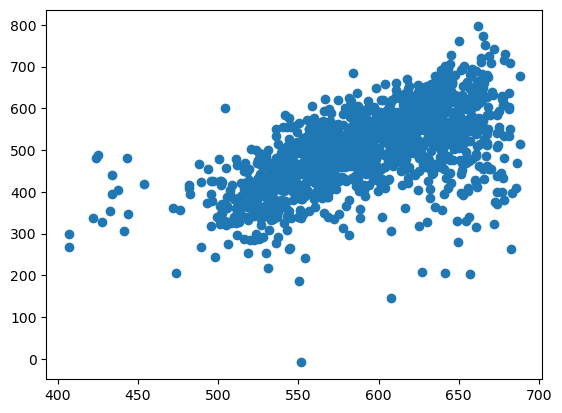

GradientBoostingRegressor(random_state=1)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(random_state=1))])
 RMSE Test: 120.542530        R2 Test: -0.610886
RMSE Train: 31.938531       R2 Train: 0.782065


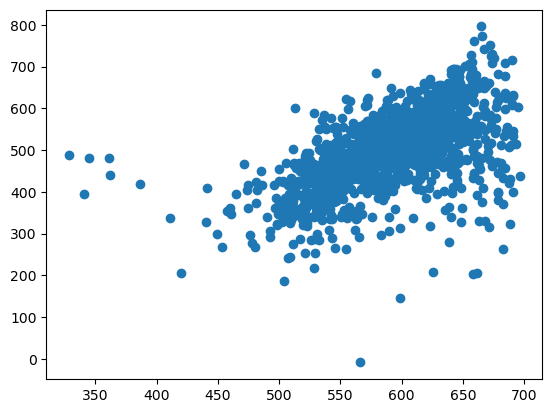

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 999066.1623440786, tolerance: 524.6960737826976
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0, max_iter=50000, random_state=1, selection='random')
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso',
                 Lasso(alpha=0, max_iter=50000, random_state=1,
                       selection='random'))])
 RMSE Test: 140.360577        R2 Test: -1.184110
RMSE Train: 42.219134       R2 Train: 0.619183


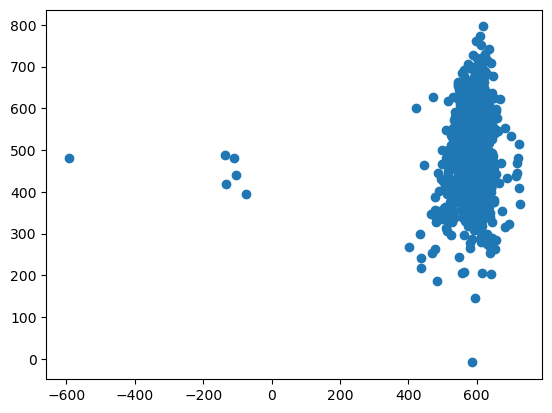

In [45]:
train_str_list, test_str_list = list_test_train_df(all_df_now,
                                                   train_field = 'Vollebekk', 
                                                   test_field = 'Staur', 
                                                   year = '2019')
suffix_title = 'Vollebekk_Vs_Staur_2019'

train_df_list = []
test_df_list = []
for x in train_str_list:
    train_df_list.append(locals()[x])
for x in test_str_list:
    test_df_list.append(locals()[x])

if len(train_str_list) > 0 and len(test_str_list) > 0:
    train_df = pd.concat(train_df_list)
    test_df = pd.concat(test_df_list)

    X_train = train_df[training_features]
    y_train = train_df[target_features].values.ravel()
    X_test = test_df[training_features]
    y_test = test_df[target_features].values.ravel()
    print('ok')
    # Getting scores using cross_val_score
    for model in models:
        importances, RMSE_test_temp, RMSE_train_temp, R2_test_temp, R2_train_temp, GKF_CV_temp, y_pred = training_regr(
            model, X_train, y_train, X_test, y_test, scatter=scatter_plot)
        if importances is not None:
            plot_feat_imp(feature_importance=importances,
                          model=model,
                          train_feat=training_features,
                          threshold=threshold_all,
                          sort_feat=sort_feature_imp,
                          show_plot=show_feat_imp_plot,
                          save_plot=save_feat_imp_plot,
                          export_path=export_path_plots,
                          save_suffix='Staur_Vs_Vollebekk_all')
        if save_results_now:
            save_results(model=model,
                         agg_method=agg_method,
                         train_field=train_str_list,
                         test_field=test_str_list,
                         features_all=[training_features,
                                       base_indices,
                                       spectral_indices_all,
                                       spectral_indices,
                                       weather_features, export_path],
                         importances=importances,
                         RMSE_test=RMSE_test_temp,
                         RMSE_train=RMSE_train_temp,
                         R2_test=R2_test_temp,
                         R2_train=R2_train_temp,
                         GKF_CV=GKF_CV_temp)

###

In [83]:
class StopExecution(Exception):
    def _render_traceback_(self):
        pass

raise StopExecution

In [ ]:
# def exit(): raise StopExecution

In [ ]:
print(ok)

In [ ]:
ERROR

# Plotting Results

In [ ]:
results_csv = pd.read_csv(export_path+'results_org.csv')
res_df = results_csv[['Aggregation_method','Train_field', 'Test_field', 'RMSE_test', 'RMSE_train',
       'R2_test', 'R2_train']]

In [ ]:
res_simp = res_df[res_df.Aggregation_method == 'Simpsons']
res_simp.drop(['Aggregation_method'], axis=1, inplace=True)
res_simp

In [ ]:
plot_res_df = np.array(res_simp.iloc[49:-1,4:])
plot_res_df = plot_res_df.astype(np.float)
plot_res_df

In [ ]:
import numpy  as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

matrix = plot_res_df

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xpos = [range(matrix.shape[0])]
ypos = [range(matrix.shape[1])]
xpos, ypos = np.meshgrid(xpos, ypos)
xpos = xpos.flatten('F')
ypos = ypos.flatten('F')
zpos = np.zeros_like(xpos)

dx = 0.5 * np.ones_like(zpos)
dy = dx.copy()
dz = matrix.flatten()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz,  zsort='average')

plt.show()

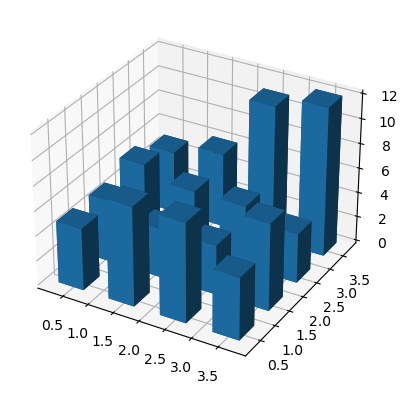

In [84]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


fig = plt.figure()
ax = fig.add_subplot(projection='3d')
x, y = np.random.rand(2, 100) * 4
hist, xedges, yedges = np.histogram2d(x, y, bins=4, range=[[0, 4], [0, 4]])

# Construct arrays for the anchor positions of the 16 bars.
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 16 bars.
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

plt.show()

In [85]:
y

array([3.1369191 , 1.58819015, 0.61858733, 2.88477299, 3.34732362,
       3.75142081, 2.30685528, 0.78010624, 0.47117588, 3.80240082,
       1.13468921, 3.82624969, 3.63770185, 1.31370075, 3.80706227,
       0.4652859 , 3.4972566 , 3.94090187, 3.00134152, 3.94062586,
       3.96072094, 0.24390837, 0.01494392, 3.25001285, 2.33094688,
       0.60098393, 0.60869423, 2.10823801, 1.91762079, 0.36875975,
       2.04782973, 0.17132442, 3.22518462, 0.96879466, 3.39284439,
       2.78235943, 1.44530746, 2.02280576, 1.17668969, 2.64033828,
       2.13654141, 0.77926424, 3.44762272, 3.91211558, 3.5287465 ,
       2.10943668, 0.88563616, 0.81088986, 0.30222999, 3.81027195,
       3.51667163, 3.59769305, 0.26198273, 1.39670786, 1.93515312,
       3.02811047, 0.22710621, 0.91604907, 2.51708129, 1.15530884,
       3.98086084, 1.67240682, 3.94040032, 3.04979149, 0.22209944,
       1.27081141, 3.87104853, 0.239195  , 0.03206925, 2.33695948,
       2.60213666, 3.24638583, 1.73975863, 2.82964713, 2.33831

In [86]:
hist

array([[ 5.,  5.,  6.,  5.],
       [ 8.,  4.,  5.,  6.],
       [ 8.,  4.,  5., 11.],
       [ 5.,  7.,  4., 12.]])

# GRID SEARCH

## Variables

In [87]:
threshold_all = 'top_25'
sorted_all = True
agg_method = 'Simpsons'
# agg_method = 'Trapezoid'
# training_features = base_indices + spectral_indices + environment_var
# training_features = base_indices + spectral_indices + weather_features
training_features =  spectral_indices + weather_features
# training_features = spectral_indices

target_features

group_feature = ['Name']

if agg_method == 'Simpsons':
    all_df_now = all_df_simps.copy()
elif agg_method == 'Trapezoid': 
    all_df_now = all_df_trapz.copy()

In [88]:
temp_list = [x for x in all_df_now if not 'Robot' in x]

# Making list of df for conct before training
# This is different form list of srtings, as this is a list of actual dataframes
df_list = []
for x in temp_list:
    df_list.append(locals()[x])

df_ = pd.concat(df_list)

X = df_[training_features].values
y = df_[target_features].values
groups = df_[group_feature].values.ravel()

gkf = list(GroupKFold(n_splits=6).split(X, y, groups))


## Testing

In [89]:
scores = ['neg_root_mean_squared_error', 'r2']
cv = 5
core = 6
verbos = 5

## Trying several models

### RandomForestRegressor

In [90]:
scores = ['neg_root_mean_squared_error', 'r2']
cv = 5
core = 6
verbos = 5

#==============================================================================
# RandomForestRegressor
#==============================================================================
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
sc = StandardScaler()
pipe = Pipeline(steps=[('sc', sc), ('model', model)])

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
param_grid = {
    'model__n_estimators': n_estimators,
#                'model__max_features': max_features,
#                'model__max_depth': max_depth,
#                'model__min_samples_split': min_samples_split,
#                'model__min_samples_leaf': min_samples_leaf,
               'model__bootstrap': bootstrap}


estimator = pipe

# for score in scores:
# grid(Xtrain = X,
#             ytrain = y,
#             estimator = pipe,
#             params_grid = param_grid,
#             scores=scores,
#             cvs = cv,
#             cores=core,
#             verb=verbos)
# print(score)

### GradientBoostingRegressor

In [91]:
#==============================================================================
# GradientBoostingRegressor
#==============================================================================
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
sc = StandardScaler()
pipe = Pipeline(steps=[('sc', sc), ('model', model)])
# param_grid   =  [{'model__loss' : ['ls', 'lad', 'huber', 'quantile'],
# #                   'model__learning_rate' : [0.001, 0.01, 0.1, 1],
# #                   'model__n_estimators' : range(0,500, 100),
                  
# #                   'model__max_depth':range(5,16,2), 
# #                   'model__min_samples_split':range(200,1100, 200), # 2100
# #                   'model__min_samples_leaf':range(30,71,10),
#                   'model__max_features':range(7,20,2),
#                   'model__subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}]

param_grid   =  [{'model__loss' : ['huber'],
#                   'model__learning_rate' : [0.001, 0.01, 0.1, 1],
#                   'model__n_estimators' : range(0,500, 100),
                  
                  'model__max_depth':range(5,16,2), 
#                   'model__min_samples_split':range(2,5), # 2100
#                   'model__min_samples_leaf':range(1,2),
#                   'model__max_features':range(5,6),
                  'model__subsample':[0.7,0.8]}]
# pipe.get_params()
estimator = pipe

for score in scores:
    grid(Xtrain = X.values,
                ytrain = y.values,
                estimator = pipe,
                params_grid = param_grid,
                scores=score,
                cvs = cv,
                cores=core,
                verb=verbos)
    print(score)

AttributeError: 'numpy.ndarray' object has no attribute 'values'

### Lasso

In [ ]:
#==============================================================================
# Lasso
#==============================================================================
from sklearn.linear_model import Lasso
model = Lasso()
sc = StandardScaler()
pipe = Pipeline(steps=[('sc', sc), ('model', model)])
param_grid   =  [{'model__alpha' : [x*0.1 for x in range(1,10)],
                  'model__max_iter' : [x for x in range(50, 10000, 50)],
                  'model__selection' : ['cyclic','random']}]
estimator = pipe

for score in scores:
    grid(Xtrain = X,
                ytrain = y,
                estimator = pipe,
                params_grid = param_grid,
                scores=score,
                cvs = cv,
                cores=core,
                verb=verbos)
    print(score)

### Ridge Regressions

In [ ]:
#==============================================================================
# Ridge
#==============================================================================
from sklearn.linear_model import Ridge
model = Ridge()
sc = StandardScaler()
pipe = Pipeline(steps=[('sc', sc), ('model', model)])
param_grid   =  [{'model__alpha' : [x*1. for x in range(1,10)],
                  'model__solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}]
estimator = pipe

for score in scores:
    grid(Xtrain = X,
                ytrain = y,
                estimator = pipe,
                params_grid = param_grid,
                scores=score,
                cvs = cv,
                cores=core,
                verb=verbos)
    print(score)

### ElasticNet

In [ ]:
#==============================================================================
# ElasticNet
#==============================================================================
from sklearn.linear_model import ElasticNet
model = ElasticNet()
sc = StandardScaler()
pipe = Pipeline(steps=[('sc', sc), ('model', model)])
param_grid   =  [{'model__alpha' : [x*0.1 for x in range(1,10)],
                  'model__max_iter' : [x for x in range(50, 10000, 50)],
                  'model__l1_ratio' : [x*0.1 for x in range(1,10)]}]
estimator = pipe

for score in scores:
    grid(Xtrain = X,
                ytrain = y,
                estimator = pipe,
                params_grid = param_grid,
                scores=score,
                cvs = cv,
                cores=core,
                verb=verbos)
    print(score)

### OrthogonalMatchingPursuit

In [ ]:
#==============================================================================
# OrthogonalMatchingPursuit
#==============================================================================
from sklearn.linear_model import OrthogonalMatchingPursuit
model = OrthogonalMatchingPursuit()
sc = StandardScaler()
pipe = Pipeline(steps=[('sc', sc), ('model', model)])
param_grid   =  [{'model__fit_intercept' : [True, False],
                  'model__n_nonzero_coefs' : [x for x in range(1,10)]}]
estimator = pipe

for score in scores:
    grid(Xtrain = X,
                ytrain = y,
                estimator = pipe,
                params_grid = param_grid,
                scores=score,
                cvs = cv,
                cores=core,
                verb=verbos)
    print(score)

### BayesianRidge

In [ ]:
#==============================================================================
# BayesianRidge
#==============================================================================
from sklearn.linear_model import BayesianRidge
model = BayesianRidge()
sc = StandardScaler()
pipe = Pipeline(steps=[('sc', sc), ('model', model)])
param_grid   =  [{'model__n_iter' : [x for x in range(5, 150, 10)],
                  'model__alpha_1' : [1.0],
                  'model__alpha_2' : [x*0.000001 for x in [1,10,100,1000,10000,100000,1000000]],
                  'model__lambda_1' : [x*0.000001 for x in [1,10,100,1000,10000,100000,1000000]],
                  'model__lambda_2' : [1.0]}]
estimator = pipe

for score in scores:
    grid(Xtrain = X,
                ytrain = y,
                estimator = pipe,
                params_grid = param_grid,
                scores=score,
                cvs = cv,
                cores=core,
                verb=verbos)
    print(score)

### ARDRegression

In [ ]:
#==============================================================================
# ARDRegression
#==============================================================================
from sklearn.linear_model import ARDRegression
model = ARDRegression()
sc = StandardScaler()
pipe = Pipeline(steps=[('sc', sc), ('model', model)])
param_grid   =  [{'model__n_iter' : [x for x in range(5, 150, 10)],
                  'model__alpha_1' : [1.0],
#                       'model__alpha_2' : [x*0.000001 for x in [1,10,100,1000,10000,100000,1000000]],
                  'model__lambda_1' : [0.01],
                  'model__lambda_2' : [x*0.000001 for x in [1,10,100,1000,10000,100000,1000000]],
                  'model__verbose' : [True]}]
estimator = pipe

for score in scores:
    grid(Xtrain = X,
                ytrain = y,
                estimator = pipe,
                params_grid = param_grid,
                scores=score,
                cvs = cv,
                cores=core,
                verb=verbos)
    print(score)

### RANSACRegressor

In [ ]:
#==============================================================================
# RANSACRegressor
#==============================================================================
from sklearn.linear_model import RANSACRegressor
model = RANSACRegressor()
sc = StandardScaler()
pipe = Pipeline(steps=[('sc', sc), ('model', model)])
param_grid   =  [{'model__min_samples' : [x/.1 for x in range(1, 10)],
                  'model__max_trials' : [x for x in range(1, 500,50)],
                  'model__loss' : ['absolute_loss', 'squared_loss']}]
estimator = pipe

for score in scores:
    grid(Xtrain = X,
                ytrain = y,
                estimator = pipe,
                params_grid = param_grid,
                scores=score,
                cvs = cv,
                cores=core,
                verb=verbos)
    print(score)

### TheilSenRegressor

In [ ]:
#==============================================================================
# TheilSenRegressor
#==============================================================================
# from sklearn.linear_model import TheilSenRegressor
# model = TheilSenRegressor()
# sc = StandardScaler()
# pipe = Pipeline(steps=[('sc', sc), ('model', model)])
# param_grid   =  [{'model__max_subpopulation' : [x*0.000001 for x in [1,10,100,1000,10000,100000,1000000]],
#                   'model__n_subsamples' : [x for x in range(9, 1300,50)],
#                   'model__max_iter' :  [x for x in range(50, 1000, 50)]}]
# estimator = pipe

# for score in scores:
#     grid(Xtrain = X,
#                 ytrain = y,
#                 estimator = pipe,
#                 params_grid = param_grid,
#                 scores=score,
#                 cvs = cv,
#                 cores=core,
#                 verb=verbos)
#     print(score)

### HuberRegressor

In [ ]:
#==============================================================================
# HuberRegressor
#==============================================================================
from sklearn.linear_model import HuberRegressor
model = HuberRegressor()
sc = StandardScaler()
pipe = Pipeline(steps=[('sc', sc), ('model', model)])
param_grid   =  [{'model__epsilon' : [x/.01 for x in range(100, 200, 5)],
                  'model__alpha' : [x*0.000001 for x in [1,10,100,1000,10000,100000,1000000]]}]
estimator = pipe

for score in scores:
    grid(Xtrain = X,
                ytrain = y,
                estimator = pipe,
                params_grid = param_grid,
                scores=score,
                cvs = cv,
                cores=core,
                verb=verbos)
    print(score)

### DecisionTreeRegressor

In [ ]:
#==============================================================================
# DecisionTreeRegressor
#==============================================================================
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
sc = StandardScaler()
pipe = Pipeline(steps=[('sc', sc), ('model', model)])
param_grid   =  [{'model__max_depth' : [None]+[x for x in range(1, 100,5)],
                  'model__min_samples_leaf' : [x for x in range(1, 50,5)],
                  'model__min_samples_split' : [2]+[x for x in range(1, 50,5)],
                  'model__max_features' : [x for x in range(1, 10)]}]
estimator = pipe

for score in scores:
    grid(Xtrain = X,
                ytrain = y,
                estimator = pipe,
                params_grid = param_grid,
                scores=score,
                cvs = cv,
                cores=core,
                verb=verbos)
    print(score)

### GaussianProcessRegressor

In [ ]:
#==============================================================================
# GaussianProcessRegressor
#==============================================================================
from sklearn.gaussian_process import GaussianProcessRegressor
model = GaussianProcessRegressor()
sc = StandardScaler()
pipe = Pipeline(steps=[('sc', sc), ('model', model)])
param_grid   =  [{'model__kernel' : [None]+['rbf', 'sigmoid',  'linear', 'poly'],
                  'model__alpha' : [x*0.0000000001 for x in [1,10,100,1000,10000,100000,1000000]]}]
estimator = pipe

for score in scores:
    grid(Xtrain = X,
                ytrain = y,
                estimator = pipe,
                params_grid = param_grid,
                scores=score,
                cvs = cv,
                cores=core,
                verb=verbos)
    print(score)

### KNeighborsRegressor

In [ ]:
#==============================================================================
# KNeighborsRegressor
#==============================================================================
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()
sc = StandardScaler()
pipe = Pipeline(steps=[('sc', sc), ('model', model)])
param_grid   =  [{'model__n_neighbors' : [x for x in range(1, 100,5)],
                  'model__weights' : ['uniform', 'distance'],
                  'model__algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
                  'model__leaf_size' : [x for x in range(10, 50, 5)]}]
estimator = pipe

for score in scores:
    grid(Xtrain = X,
                ytrain = y,
                estimator = pipe,
                params_grid = param_grid,
                scores=score,
                cvs = cv,
                cores=core,
                verb=verbos)
    print(score)

### RadiusNeighborsRegressor

In [ ]:
# #==============================================================================
# # RadiusNeighborsRegressor
# #==============================================================================
# from sklearn.neighbors import RadiusNeighborsRegressor
# model = RadiusNeighborsRegressor()
# sc = StandardScaler()
# pipe = Pipeline(steps=[('sc', sc), ('model', model)])
# param_grid   =  [{'model__radius' : [x*1. for x in range(1, 10)],
#                   'model__weights' : ['uniform', 'distance'],
#                   'model__algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
#                   'model__p' : [x for x in range(1, 10)]}]
# estimator = pipe

# for score in scores:
#     grid(Xtrain = X,
#                 ytrain = y,
#                 estimator = pipe,
#                 params_grid = param_grid,
#                 scores=score,
#                 cvs = cv,
#                 cores=core,
#                 verb=verbos)
#     print(score)

### SVR

In [ ]:
# #==============================================================================
# # SVR
# #==============================================================================
# from sklearn.svm import SVR
# model = SVR()
# sc = StandardScaler()
# pipe = Pipeline(steps=[('sc', sc), ('model', model)])
# param_grid   =  [{'model__radius' : [x*1. for x in range(1, 10)],
#                   'model__weights' : ['uniform', 'distance'],
#                   'model__algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
#                   'model__p' : [x for x in range(1, 10)]}]
# estimator = pipe

# for score in scores:
#     grid(Xtrain = X,
#                 ytrain = y,
#                 estimator = pipe,
#                 params_grid = param_grid,
#                 scores=score,
#                 cvs = cv,
#                 cores=core,
#                 verb=verbos)
#     print(score)

### RandomForestRegressor

In [ ]:
#==============================================================================
# RandomForestRegressor
#==============================================================================
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
sc = StandardScaler()
pipe = Pipeline(steps=[('sc', sc), ('model', model)])
param_grid   =  [{'model__max_depth' : [x for x in range(1, 10)],
                  'model__max_features' : ['auto', 'sqrt', 'log2'],
                  'model__n_estimators' : [x for x in range(1, 1000, 50)]}]
estimator = pipe

for score in scores:
    grid(Xtrain = X,
                ytrain = y,
                estimator = pipe,
                params_grid = param_grid,
                scores=score,
                cvs = cv,
                cores=core,
                verb=verbos)
    print(score)


In [ ]:
# t_end = time.time()
# tt = t_end - t_start
# time_taken.append(tt)
# print('Total time complete: ', (tt) / 60, 'minutes')

## Permutation importance

In [ ]:


# PERMUTATION

from sklearn.inspection import permutation_importance


result = permutation_importance(gs_xgb_fitted, X_test, y_test, n_repeats=100, random_state=0)

# ==================================
# Feature selection
# ===================================

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# define feature selection
fs = SelectKBest(score_func=f_regression, k=10)
# apply feature selection
X_selected = fs.fit_transform(X, y)
print(X_selected.shape)

# Plot importances
fig, ax = plt.subplots(figsize=(25, 25))
ind = indices = np.argsort(result.importances_mean)[::-1]
plt.barh(X_test.columns, result.importances_mean[ind])
plt.show()


In [ ]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score, average = 'macro'),
           'recall': make_scorer(recall_score, average = 'macro'),
           'f1': make_scorer(f1_score, average = 'macro')}
grid_search_rfc = GridSearchCV(rfc, param_grid = grid_values, scoring = scoring, refit='f1')
grid_search_rfc.fit(x_train, y_train)

grid_search_rfc.best_params_
grid_search_rfc.cv_results_

# cv_results[‘mean_test_<metric_name>’]
grid_search_rfc.cv_results_['mean_test_recall']


## Restart the kernel

In [ ]:
from IPython.core.display import HTML
HTML("<script>Jupyter.notebook.kernel.restart()</script>")